<a href="https://colab.research.google.com/github/samwpolk/COMPSCIX433.6-010/blob/master/SamPolkFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sam Polk, San Diego Ca 
# Leaf Classfication 
Motivation: Insight into Linear Discriminant Analysis as classier and as  feature reduction metheod
# Audience: Student learning classification models

We examine a "Leaf" data set with 14 features with real values and species names as the categorical class variable. The goal is to get a better feel for how LDA approaches dimensionality reduction and how it used as a classifier

If if have K classes {1,2,3,4,....,K} with and input vector X.
We say X belongs to a class i when P(Y=i|X) is maximixed.

We use Bayes theorem to relate P(Y|X) to P(X|Y). We assume P(X|Y) is
a probability density function and in this case, we pick the Normal distribution because it is convenient. We are insisting that the input variables X are approximately normally distributed. This will allow us to find a discriminator function  that is a linear function of X(shown for one perdictor):  **d(X) = (MUi\*X)/Sigma^2  - (Mui^2)/(2\*Sigma*2) + log(P(Y=i)**. The linear term in X is how this LDA got its name.  LDA is an extension of
the Fishers discriminant analyses which is a bit ironic since he was a life long critic of Bayes theorem. 


Like in Principal Component Analysis, we turned to Linear Algebra to calculate eignenvectors/values from something close to a covarince matrix.  The eigenvectors (linear discrimants) allow us to transform our features space into subspace that maximizes class separation there by reducing the dimenison of our original feature space.


In [2]:
from IPython.display import HTML,display, IFrame
display(IFrame(src='https://archive.ics.uci.edu/ml/datasets/Leaf#', width=1500, height=600))
#display(IFrame(src='https://repositorio-aberto.up.pt/handle/10216/67734', width=1500, height=600)) Link to published article "Development of a System for Automatic Plant Species Recognition"

In [ ]:
import io
import sys
import os
from google.colab import files
fl = files.upload()




In [ ]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import pandas.util.testing as tm

from sklearn.datasets import make_classification

from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor,  RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,plot_confusion_matrix

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA

from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)

from sklearn.pipeline import make_pipeline


!pip install dabl;
import dabl as db

#!pip install pycaret;
#from pycaret.classification import *



Reading data for local file system, setting up some Pandas Data Frame and scaling data

In [315]:
#Read data from colab drive
df = pd.read_csv('/content/leavescsv.csv')

In [316]:
#Set up some dataframes and scale feature data
names = df['Name']
number = df['Number']
features = df.drop(['Name','Number'], axis = 1)
df_shape_features = df.drop(['Average_Intensity','Average_Contrast', 'Smoothness', 'Third_moment', 'Uniformity','Entropy','Number'],axis=1)
df_text_features = df[['Average_Intensity','Average_Contrast', 'Smoothness', 'Third_moment', 'Uniformity','Entropy','Number','Name']],;
X_train, X_test, y_train, y_test = train_test_split(features,names, random_state=323)
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)


In [317]:
df.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Eccentricity               float64
 1   Aspect_Ratio               float64
 2   Elongation                 float64
 3   Solidity                   float64
 4   Stochastic_Convexity       float64
 5   Isoperimetric_Factor       float64
 6   Maximal_Indentation_Depth  float64
 7   Lobedness                  float64
 8   Average_Intensity          float64
 9   Average_Contrast           float64
 10  Smoothness                 float64
 11  Third_moment               float64
 12  Uniformity                 float64
 13  Entropy                    float64
 14  Number                     int64  
 15  Name                       object 
dtypes: float64(14), int64(1), object(1)
memory usage: 42.6+ KB


The data is very clean but there is some concern about outliers. The Feature "Aspect Ratio" has mean 2.4 and max value 19, "Lobedness: has a mean .52 and max value of 7.2. We will examine the boxplots for the features in this dataset.

In [318]:
features.describe().style.background_gradient(cmap='Greys')

In [319]:
df.sample(8).style.background_gradient(cmap='Greys')

We can see there are highly correlated items according to correlation matrix showing there is potential for reducing the number of features and lessen the multicollinearity.

Comparing the pairwise correlation of the predictors is convenient but inadequate as there could be linear combinations of  2 or more features that could mimic the contribution of a single feature. Welook into Variance Inflation Factor to get more insight into multicollinearity.

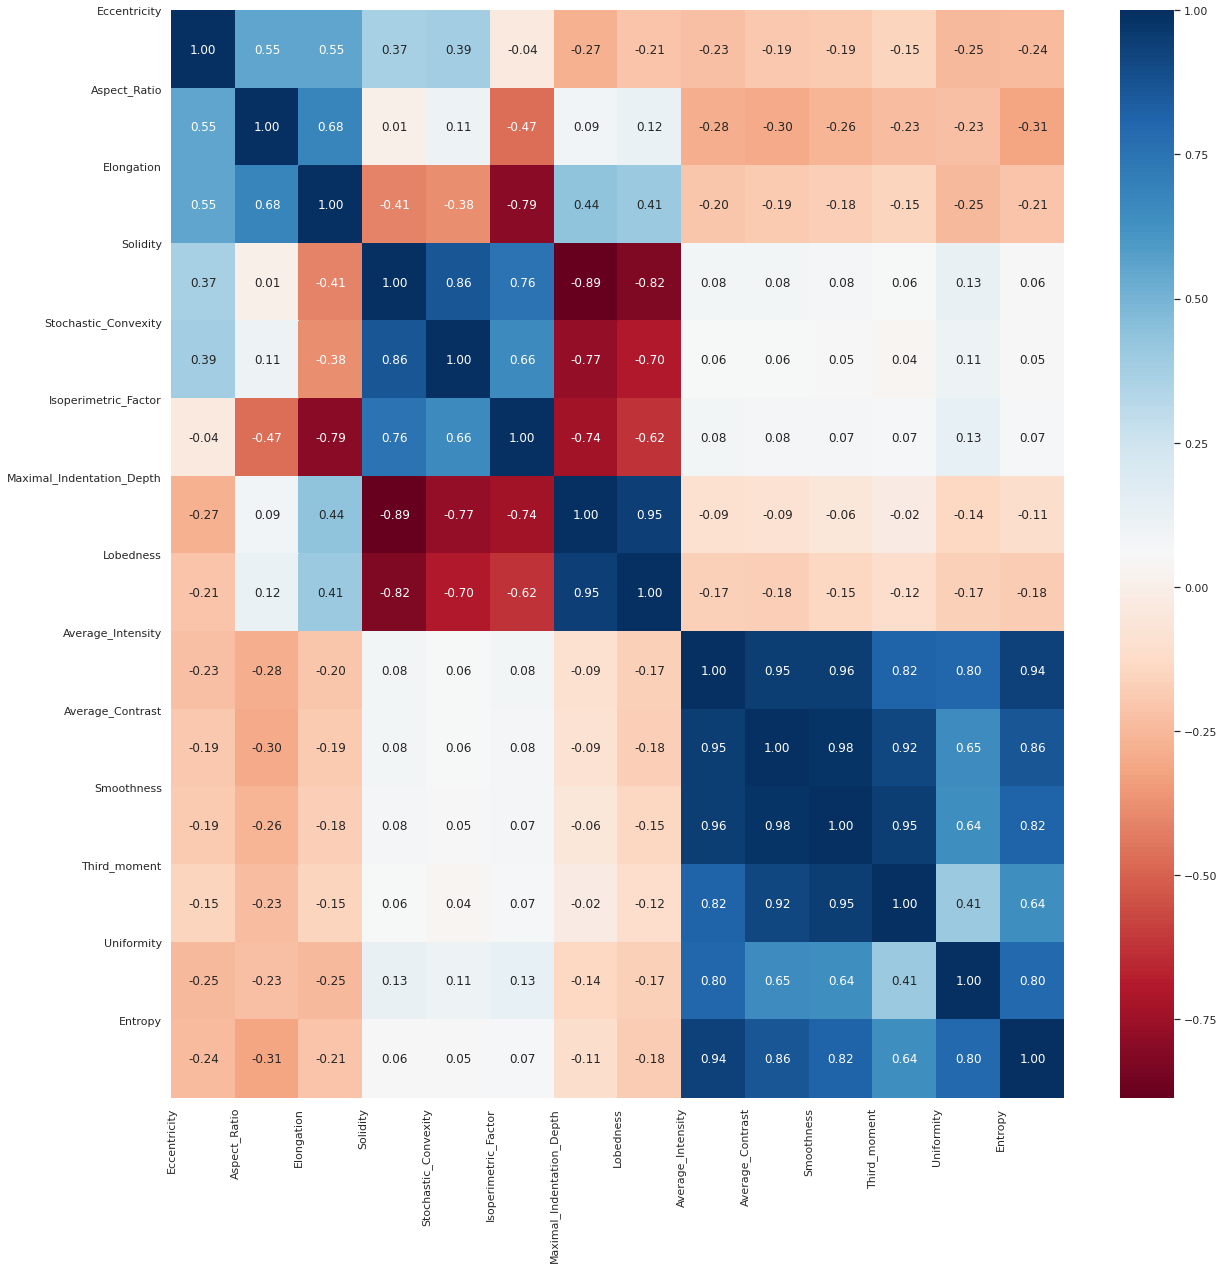

In [320]:
#import seaborn as sns
#import matplotlib.pyplot as plt
corr = df.drop(['Number'],axis = 1).corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(20, 20))
sns.set(style="dark")
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

(-1.25, 1.25, -1.25, 1.25)

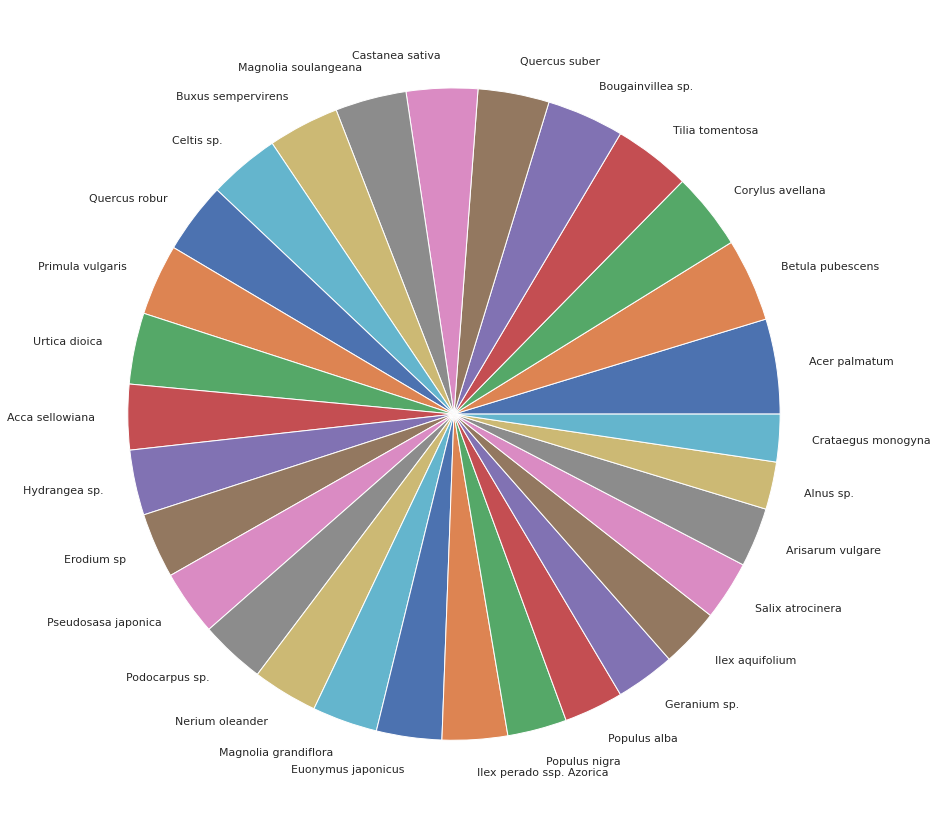

In [321]:
df["Name"].value_counts().plot(kind='pie',figsize=(15,15))
plt.axis("off")

Boxplots confirms that outliers and skewed distribution could potentially harm the ability to make accurate predictions 


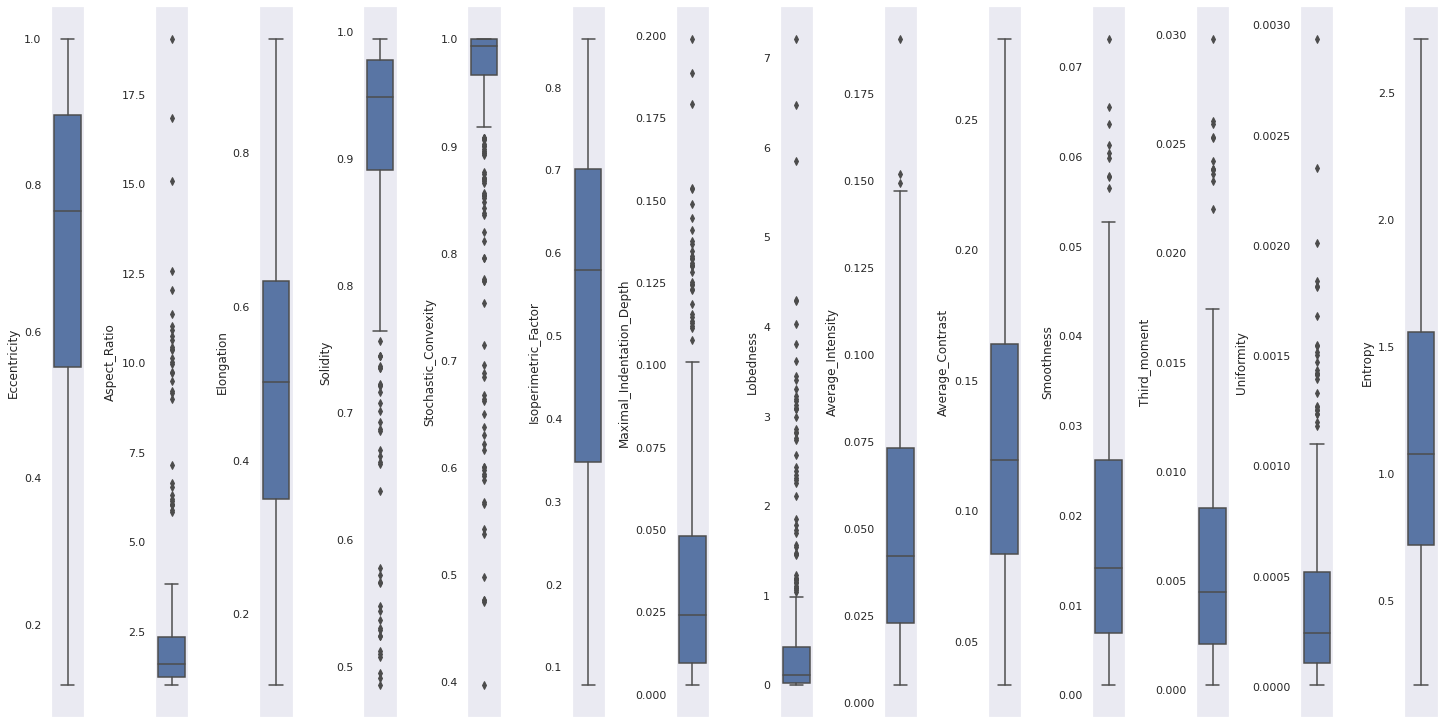

In [322]:
fig, axs = plt.subplots(ncols=14, nrows=1, figsize=(20, 10))
sns.set(style="dark")
index = 0
axs = axs.flatten()
for k,v in df.items():
    if index < 14:
      sns.boxplot(y=k, data=df, ax=axs[index])
      index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

We execute the Pair Plot to get a feeling for the pairwise correlation and to have an initial look at the features histograms with the understanding this does not entirely explain the potential multicollinearity coming from 0 and 2 or more features. 

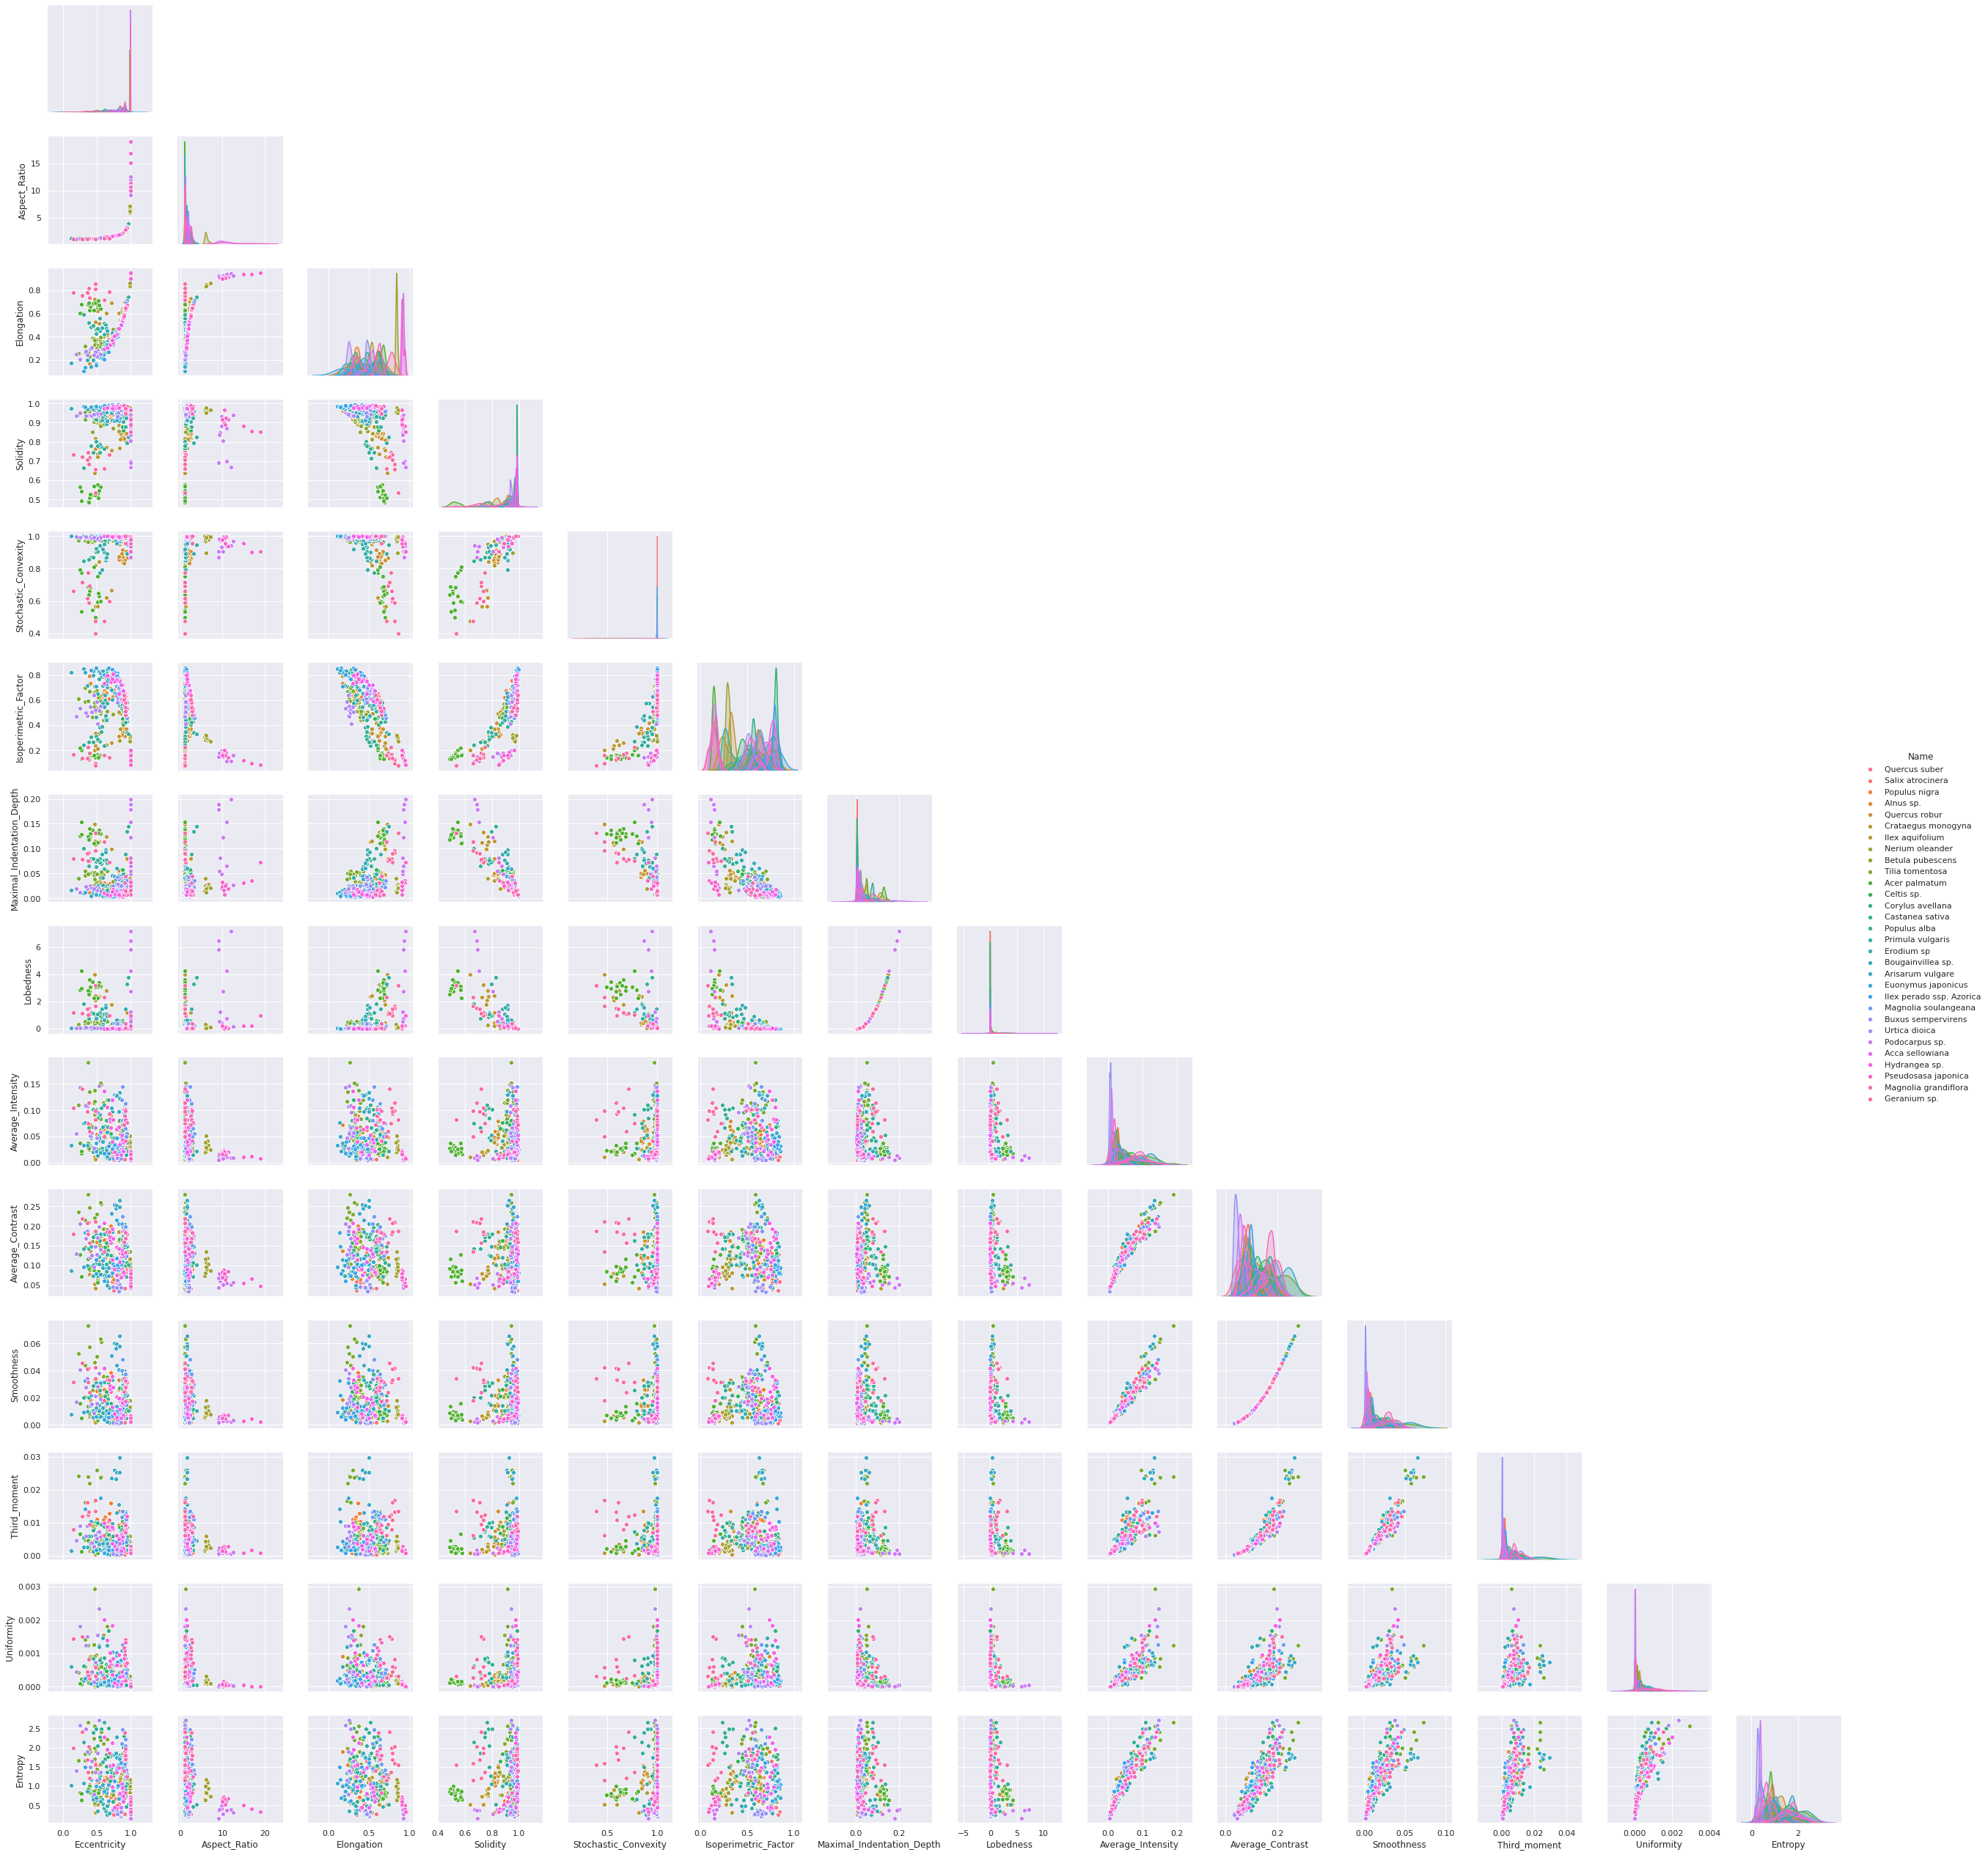

In [28]:
'''g = sns.PairGrid(df.drop(['Number'], axis=1),hue='Name',palette="Set", corner = True)
g = g.map_diag(plt.hist, linewidth=1)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()'''

'''sns.set(style="darkgrid")
sns.pairplot(df.drop(['Number'], axis=1), hue="Name", corner=True)
plt.show()'''

Variance Inflation Factor: Is an indicator of the effect the other explanatory variables have on the variance of a particular variable, given by the reciprocal of the square of the ***multiple correlation coefficient*** of the variable with remaining variables. The results below show that we have many features that are contributing to each other's variance. In other words some of our features could be expressed as a linear combination of other features. 


In [323]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_scaled
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
x=vif.round()
x.style.background_gradient(cmap='cividis')

For the Leaf dataset, we see extremely high variance inflation factors the typical cut off to remove a predictor is VIF greater than 5 or 10. We have two predictors with VIF over 1500. A majority of the other features are reporting VIFs over 5. This is a clear indication that using all the features to make a prediction could be inaccurate and also produce correlation and covariance matrices that instable.
**VIF	features**

**6**	   Eccentricity

**4**	   Aspect_Ratio

**16**	 Elongation

**11** 	 Solidity

**6**	   Stochastic_Convexity

**19**	 Isoperimetric_Factor

**27**	 Maximal_Indentation_Depth

**18**	 Lobedness

**1484**	Average_Intensity

**45**	  Average_Contrast

**2104**	Smoothness

**316**	  Third_moment

**16**	  Uniformity

**88**	  Entropy

When we removed the following features from our dataframe:


**Average Intensity**

**Average Contrast**

**Smoothness**

**Maximal Indentation Depth**

**Elongation**

**Solidity**


and recalculate the VIF for the remaining features, we noticed a dramatic lowering of the VIF values with the max value being 5


**VIF features**

**2**	  Eccentricity

**3**	   Aspect_Ratio

**4**	   Stochastic_Convexity

**4**	   Isoperimetric_Factor

**2**	   Lobedness

**2**	   Third_moment

**3**	   Uniformity

**5**	   Entropy

The correlation matrix is redisplayed for the new data frame, we still see some high pairwise correaltion but overall there is less pairwise correlation. 

A third dataframe is built with the features that we removed from our original dataframe  and we see that 'Elongation' has become free of any multi correlation 

**VIF features**

**2**	Eccentricity

**3**	Aspect_Ratio

**4**	Stochastic_Convexity

**4**	Isoperimetric_Factor

**2**	Lobedness

**2**	Third_moment

**3**	Uniformity

**5**	Entropy

In [324]:
vif = pd.DataFrame()
X1 = X.drop(['Average_Intensity','Average_Contrast','Smoothness','Maximal_Indentation_Depth','Elongation','Solidity'], axis=1)
vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]

vif["features"] = X1.columns
x=vif.round()
x.style.background_gradient(cmap='cividis')

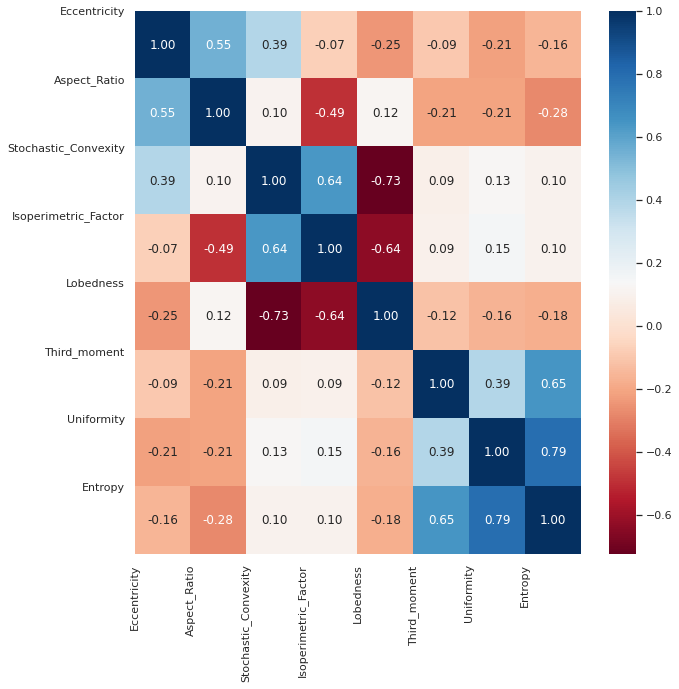

In [325]:
#import seaborn as sns
#import matplotlib.pyplot as plt
corr = X1.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
sns.set(style="dark")
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
plt.xticks(rotation=90)
#show plot
plt.show()

In [326]:
vif = pd.DataFrame()
X2 = X[['Average_Intensity','Average_Contrast','Smoothness','Maximal_Indentation_Depth','Elongation','Solidity']]
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns
x=vif.round()
x.style.background_gradient(cmap='cividis')

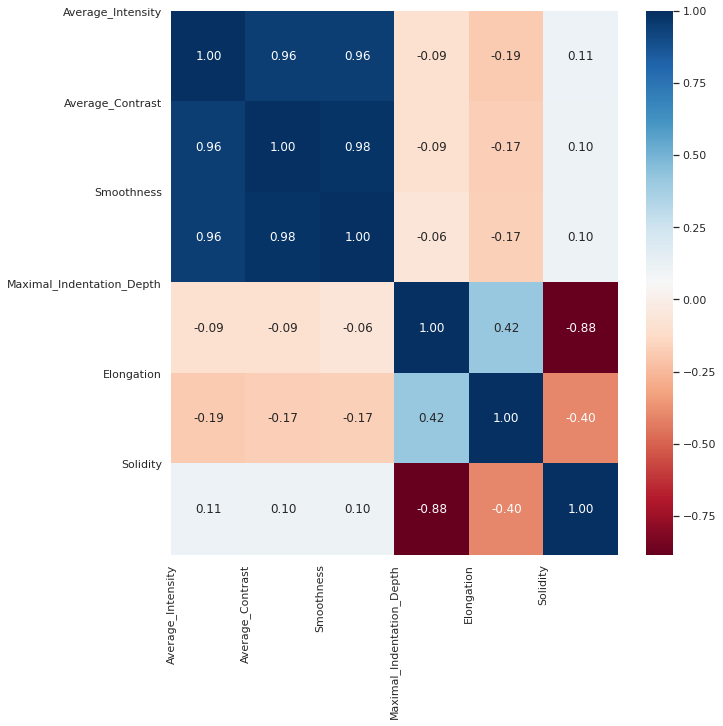

In [327]:
#import seaborn as sns
#import matplotlib.pyplot as plt
corr = X2.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
sns.set(style="dark")
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
plt.xticks(rotation=90)
#show plot
plt.show()

In [328]:
vif = pd.DataFrame()
X3 = X[['Average_Contrast','Smoothness','Average_Intensity']]
vif["VIF Factor"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif["features"] = X3.columns
x=vif.round()
x.style.background_gradient(cmap='cividis')





It is interesting to pair some features together and see what their VIF values are.



VIF	features

**11**	Smoothness

**11**	Average_Intensity

==========================================


**25**	Average_Contrast

**25**	Smoothness

==========================================

**12**	Average_Contrast

**12**	Average_Intensity


In [329]:
vif = pd.DataFrame()
X3 = X[['Smoothness','Average_Intensity']]
vif["VIF Factor"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif["features"] = X3.columns
x=vif.round()
x.style.background_gradient(cmap='cividis')



In [330]:
vif = pd.DataFrame()
X3 = X[['Average_Contrast','Smoothness']]
vif["VIF Factor"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif["features"] = X3.columns
x=vif.round()
x.style.background_gradient(cmap='cividis')

In [331]:
vif = pd.DataFrame()
X3 = X[['Average_Contrast','Average_Intensity']]
vif["VIF Factor"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif["features"] = X3.columns
x=vif.round()



Below we group the features by 4 and inspect VIF for the groupings, there  may be celver what to draw graph and have edges represent how features are contributing to the overal variation

In [332]:
import itertools as itr
lst = list(itr.combinations(X,4))
lng = len(lst)
for l in range(int(lng/2)):
    frst = lst[1][0]
    snd = lst[l][1]
    thrd = lst[l][2]
    frth =  lst[l][3]
    col= []
    col.append(frst)
    col.append(snd)
    col.append(thrd)
    col.append(frth)
    vif = pd.DataFrame()
    X3 = pd.DataFrame()
    X3 = X[col]
    vif["VIF"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
    vif["features"] = X3.columns
    x=vif.round()
    #if x['VIF'].sum() > 40: display(x.style.background_gradient(cmap='cividis'))
    sm = int(x['VIF'].agg(['sum']))
   
    if sm > 60 : display(x.style.background_gradient(cmap='cividis'))

We now take a look a Dabl a low code library that helps relieve the distraction of knowing the exact python code and libraries to run so we can focus on what is important to implement models. It quickly presents information about your data, has the option to clean data, and to test multiple models at once with one line of code.  The project is open source so you can inspect the code.



In [ ]:
display(IFrame(src='https://dabl.github.io/dev/', width=1500, height=600))


# **Dabl**
indentified the target as classification

Dropped 1 outliers in column Aspect_Ratio

Dropped 2 outliers in column Lobedness

Dropped 1 outliers in column Uniformity

Predicted the Linear Discriminant Analysis training set score: **0.872**

Target looks like classification


/usr/local/lib/python3.6/dist-packages/dabl/plot/utils.py:621: UserWarning: Dropped 1 outliers in column Aspect_Ratio.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.6/dist-packages/dabl/plot/utils.py:621: UserWarning: Dropped 2 outliers in column Lobedness.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.6/dist-packages/dabl/plot/utils.py:621: UserWarning: Dropped 1 outliers in column Uniformity.
  int(dropped), series.name), UserWarning)


Linear Discriminant Analysis training set score: 0.872


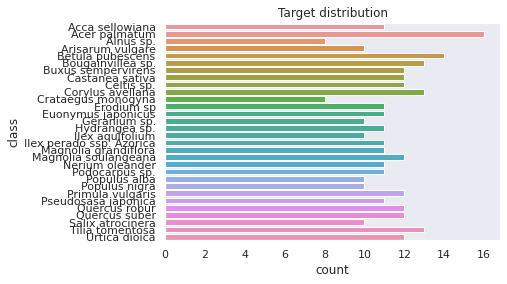

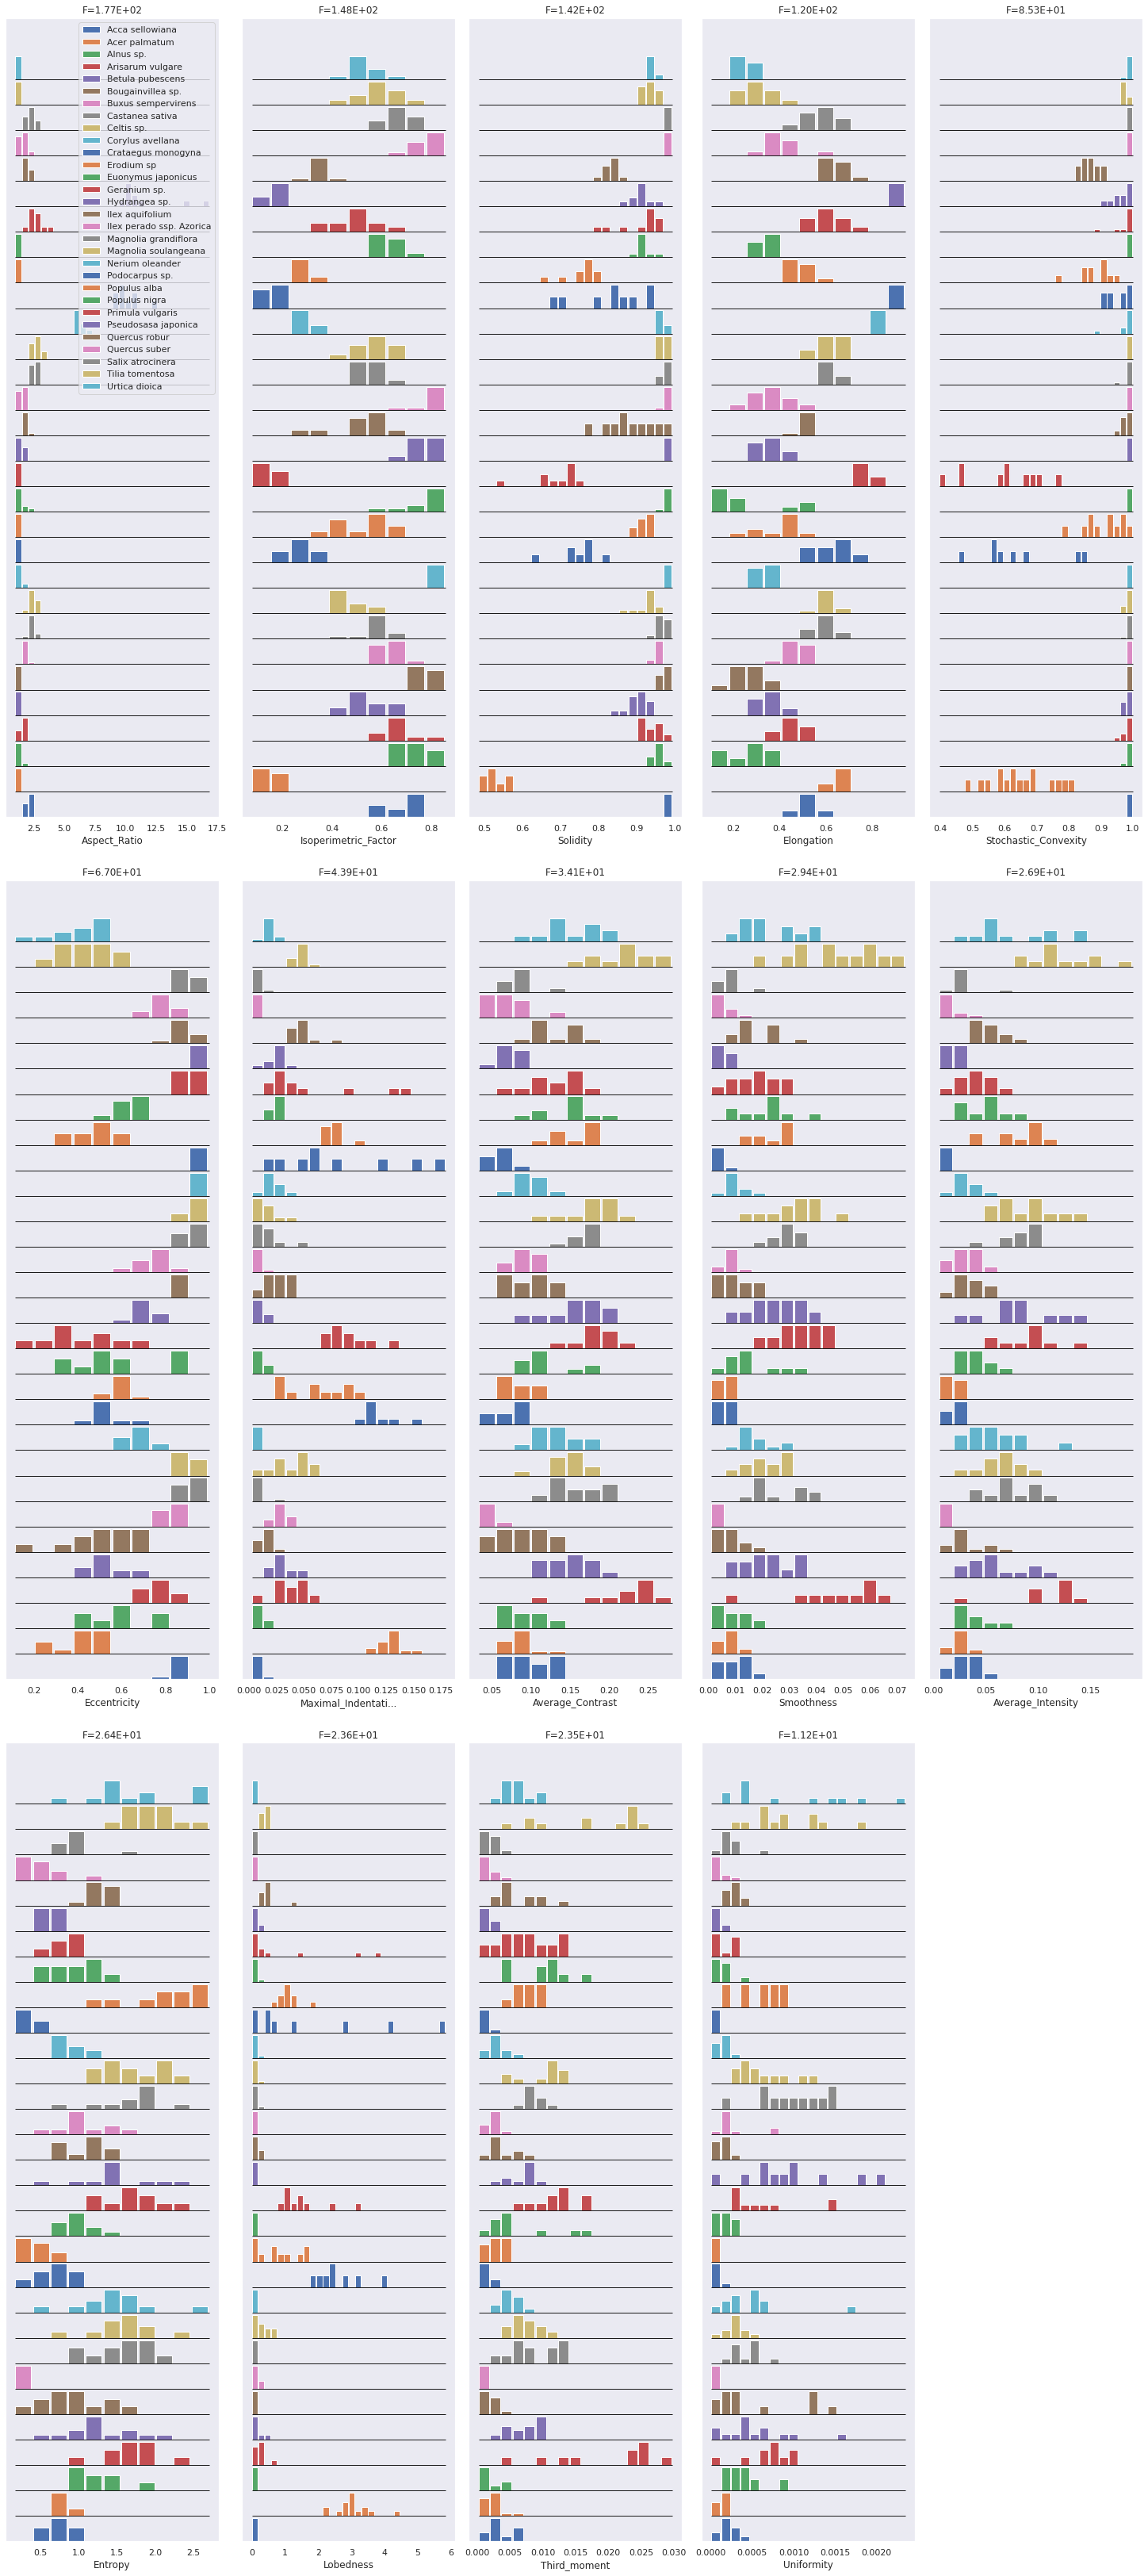

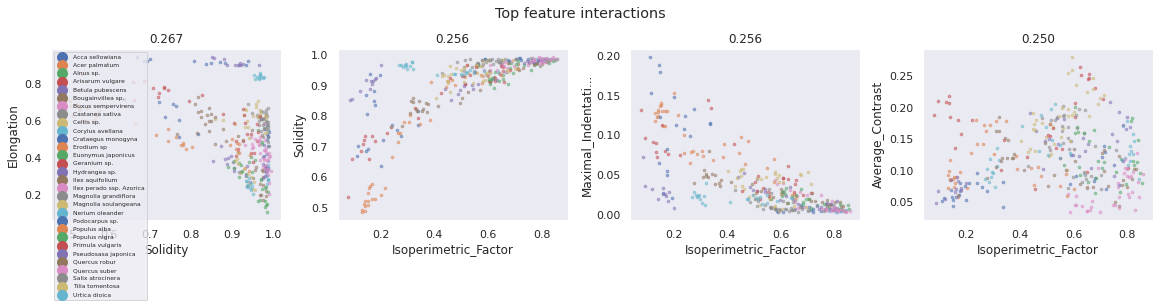

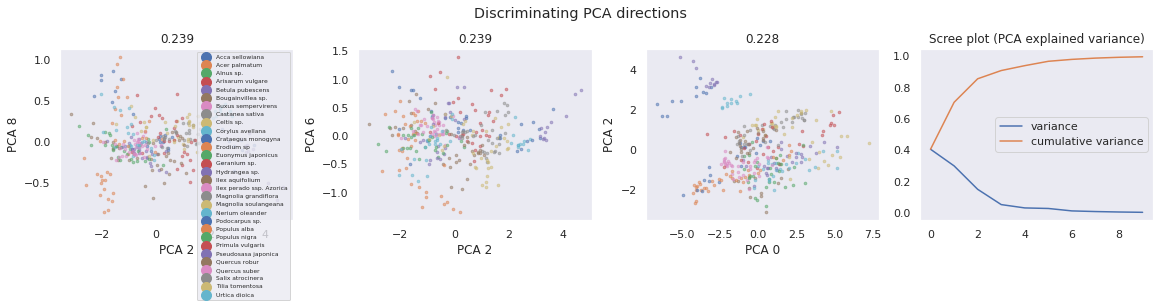

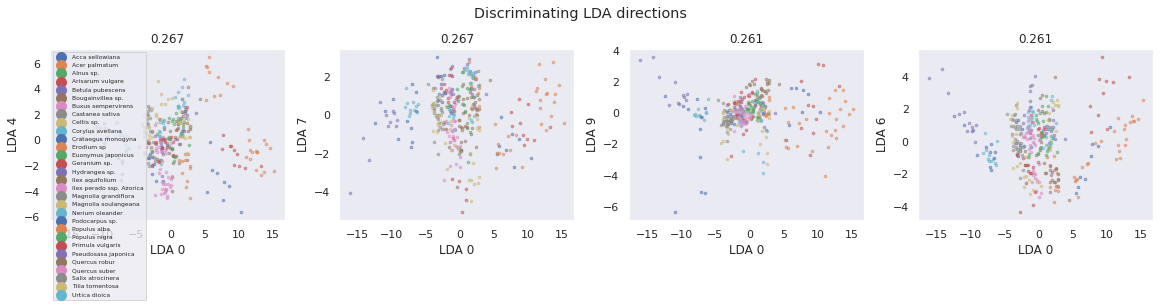

In [ ]:
#db.plot(df.drop(['Number'], axis = 1),target_col='Name', verbose=50,scatter_size=7)

Above we see the output dabl showing how are predictors are distributed, information on pairwise correlation, PCA and LDA components, and how much variation are in those components.


Below we take advantage of the dabl's SimpleClassiefiers to help us quickly test serval models as part of the preprocessing step. In this case, Logistic Regression was deemed the best model for the scaled Leaf data set

**Best model:**

**LogisticRegression(class_weight='balanced', max_iter=1000)**

**Best Scores:**


**accuracy: 0.733**


**recall_macro: 0.736**


**precision_macro: 0.697**


**f1_macro: 0.690**

In [333]:
#Executing Dabls low code SimpleClassifier(
sc = db.SimpleClassifier(random_state=314, verbose=4, shuffle=True).fit(X_train_scaled,y_train)
y_pred = sc.predict(X_test_scaled)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[CV]  ................................................................
[CV]  , accuracy=0.039, f1_macro=0.003, precision_macro=0.001, recall_macro=0.034, total=   0.0s
[CV]  ................................................................
[CV]  , accuracy=0.039, f1_macro=0.003, precision_macro=0.001, recall_macro=0.033, total=   0.0s
[CV]  ................................................................
[CV]  , accuracy=0.039, f1_macro=0.003, precision_macro=0.001, recall_macro=0.033, total=   0.0s
[CV]  ................................................................
[CV]  , accuracy=0.039, f1_macro=0.003, precision_macro=0.001, recall_macro=0.033, total=   0.0s
[CV]  ................................................................
[CV]  , accuracy=0.059, f1_macro=0.004, precision_macro=0.002, recall_macro=0.033, total=   0.0s
Running DummyClassifier(strategy='prior')
accuracy: 0.043 recall_macro: 0.034 precision_macro: 0.001 f1_macro: 0.003
=== new best DummyClassifier(strategy='prio

In [334]:
print(sc.types_)

                           continuous  dirty_float  ...  free_string  useless
Eccentricity                     True        False  ...        False    False
Aspect_Ratio                     True        False  ...        False    False
Elongation                       True        False  ...        False    False
Solidity                         True        False  ...        False    False
Stochastic_Convexity             True        False  ...        False    False
Isoperimetric_Factor             True        False  ...        False    False
Maximal_Indentation_Depth        True        False  ...        False    False
Lobedness                        True        False  ...        False    False
Average_Intensity                True        False  ...        False    False
Average_Contrast                 True        False  ...        False    False
Smoothness                       True        False  ...        False    False
Third_moment                     True        False  ...        F

In [242]:
print(sc.current_best_)

accuracy           0.733333
recall_macro       0.736015
precision_macro    0.696820
f1_macro           0.689822
Name: LogisticRegression(class_weight='balanced', max_iter=1000), dtype: float64


In [335]:
print(sc.feature_names_)

Index(['Eccentricity', 'Aspect_Ratio', 'Elongation', 'Solidity',
       'Stochastic_Convexity', 'Isoperimetric_Factor',
       'Maximal_Indentation_Depth', 'Lobedness', 'Average_Intensity',
       'Average_Contrast', 'Smoothness', 'Third_moment', 'Uniformity',
       'Entropy'],
      dtype='object')


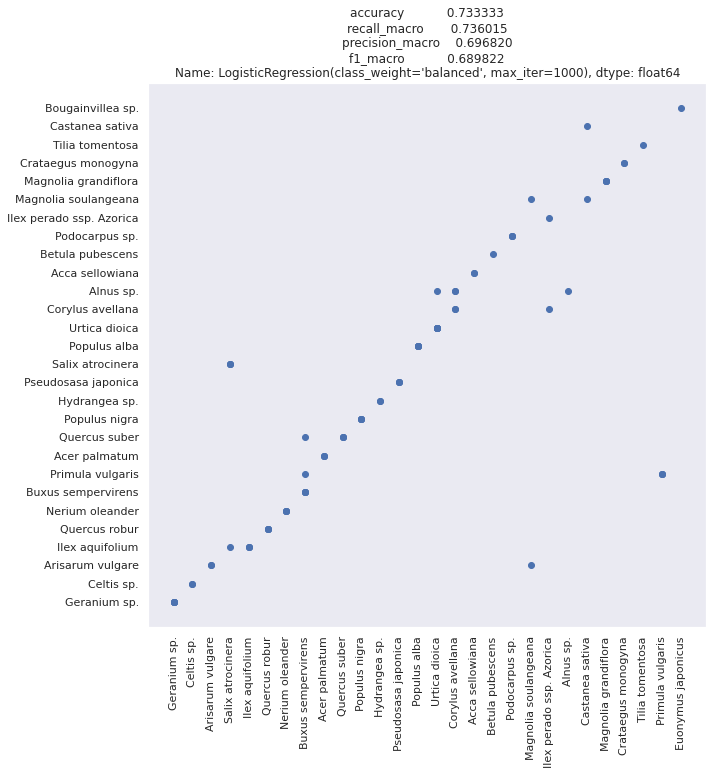

In [336]:
plt.figure(figsize=(10,10));
plt.xticks(rotation=90);
plt.title(str(sc.current_best_));
plt.scatter(y_pred,y_test);

In [ ]:
#df_clean = db.clean(df),;

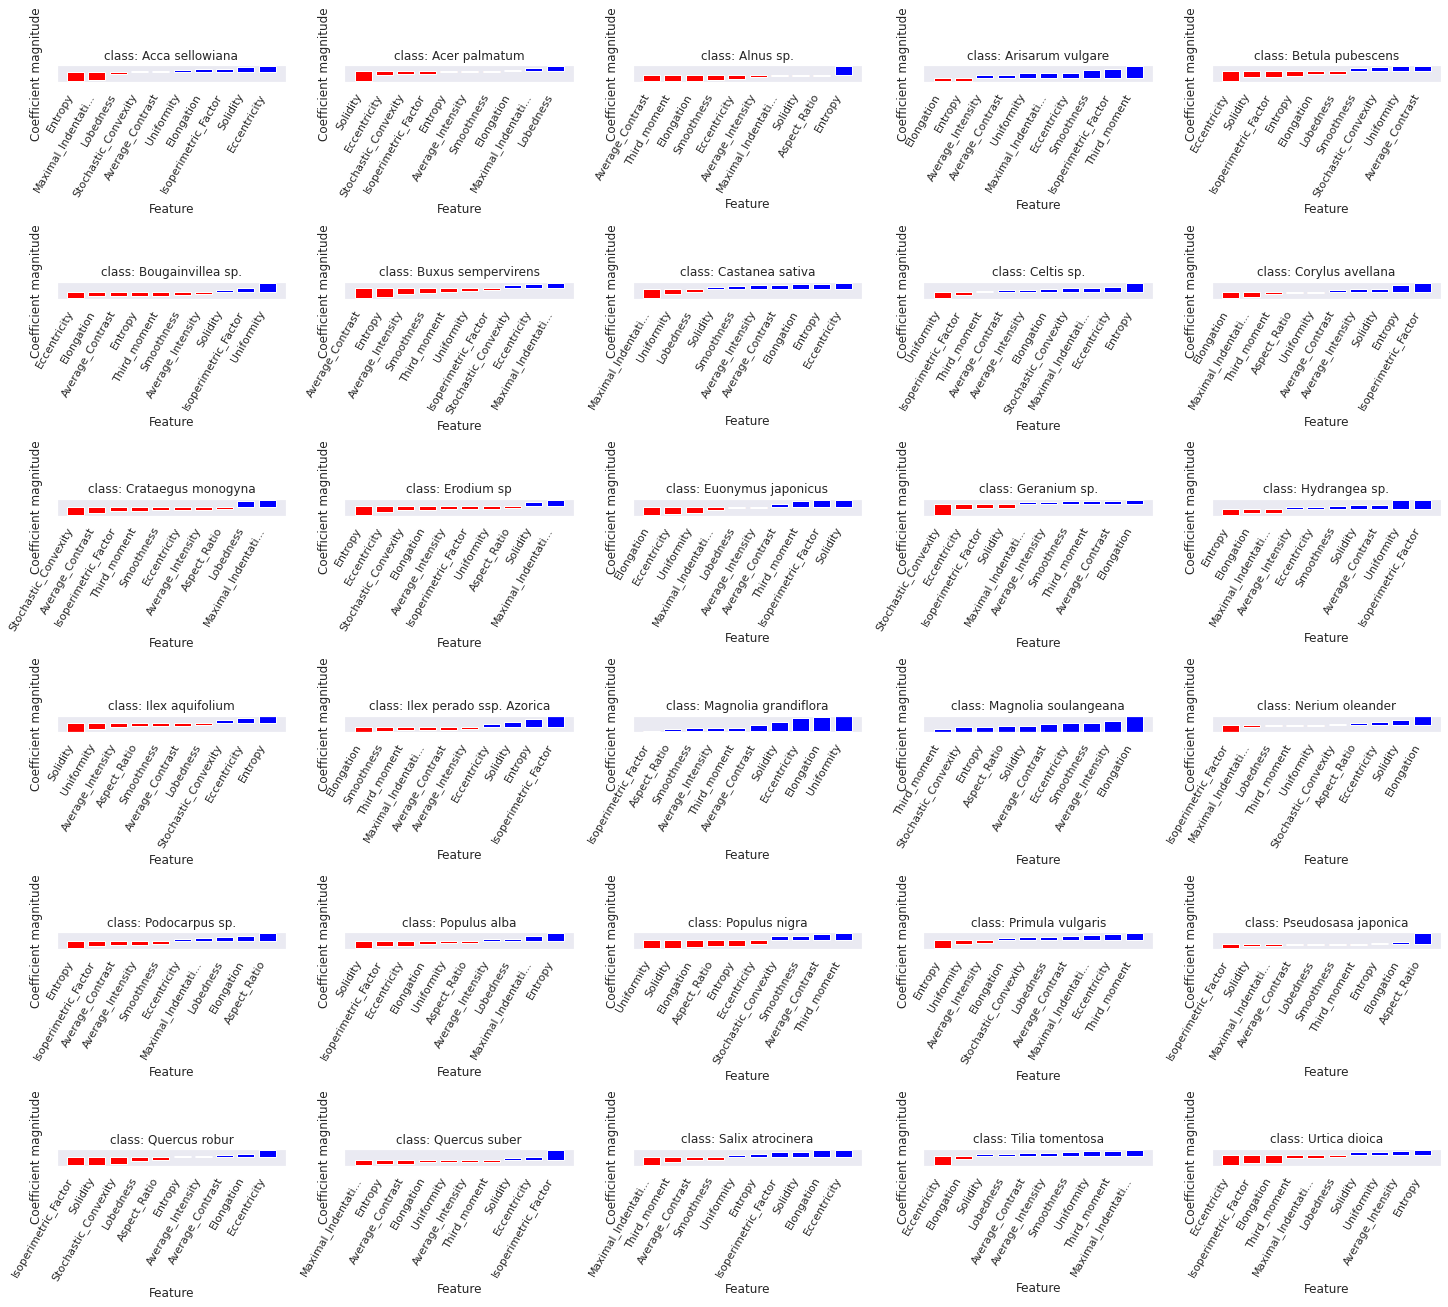

In [44]:
#db.explain(sc, n_top_features= 10)

Now that we have a solid feel for the data and some indication of what some feasible classification models could be, we would like to solidify our intuition around the data to and use the Extra Tree Regressor determine the feature importance

Feature ranking:

> 


1. feature Solidity(3) (0.106743)
2. feature Aspect_Ratio(1) (0.087352)
3. feature Elongation(2) (0.086820)
4. feature Isoperimetric_Factor(5) (0.085282)
5. feature Eccentricity(0) (0.084318)
6. feature Maximal_Indentation_Depth(6) (0.076665)
7. feature Entropy(13) (0.069093)
8. feature Lobedness(7) (0.067568)
9. feature Third_moment(11) (0.060309)
10. feature Stochastic_Convexity(4) (0.059183)
11. feature Average_Contrast(9) (0.056605)
12. feature Smoothness(10) (0.055393)
13. feature Average_Intensity(8) (0.053014)
14. feature Uniformity(12) (0.051656)

In [337]:
model = ExtraTreesRegressor()
model.fit(features,number)
fr = model.feature_importances_

Feature ranking:
1. feature Solidity(3) (0.106743)
2. feature Aspect_Ratio(1) (0.087352)
3. feature Elongation(2) (0.086820)
4. feature Isoperimetric_Factor(5) (0.085282)
5. feature Eccentricity(0) (0.084318)
6. feature Maximal_Indentation_Depth(6) (0.076665)
7. feature Entropy(13) (0.069093)
8. feature Lobedness(7) (0.067568)
9. feature Third_moment(11) (0.060309)
10. feature Stochastic_Convexity(4) (0.059183)
11. feature Average_Contrast(9) (0.056605)
12. feature Smoothness(10) (0.055393)
13. feature Average_Intensity(8) (0.053014)
14. feature Uniformity(12) (0.051656)


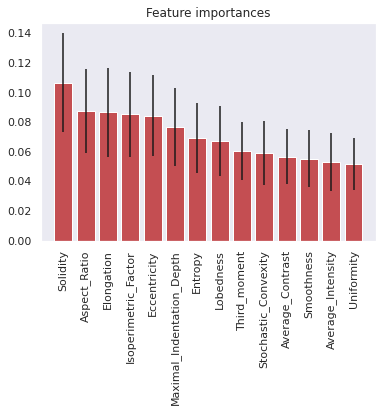

In [247]:
# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train_scaled,y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(features.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, df.columns[indices[f]]+str("("+str(indices[f])+")"), importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.xticks(rotation=90)
plt.bar(range(features.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(features.shape[1]), df.columns[indices])
plt.xlim([-1, features.shape[1]])
plt.show()

We know from our earlier analysis the variance inflation factor for  "Smoothness" was 2104 so it can potently express as a linear combination of many features. Below we compare "Smoothness" to 3 factors at a time base on their importance as determined by the Extra Tree Classifier and note which features are correlated with the "Smoothness" feature.

In [338]:
vif = pd.DataFrame()
X = X_train_scaled
X4 = X[['Solidity','Aspect_Ratio','Elongation',]]
vif["VIF Factor"] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif["features"] = X4.columns
x=vif.round()
x.style.background_gradient(cmap='cividis')

The first group show very little correlation this is not suprising as Smoothnes is texture feature and this group of features are considered shape features. Smoothnes is not correlated to these shape features.

In [339]:
vif = pd.DataFrame()
X5 = X[['Isoperimetric_Factor','Eccentricity','Maximal_Indentation_Depth','Smoothness']]
vif["VIF Factor"] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif["features"] = X5.columns
x=vif.round()
x.style.background_gradient(cmap='cividis')

The results for the second grouping is the same as above the Smoothness feature is not corrleated with these shape features.

In [340]:
vif = pd.DataFrame()
X6 = X[['Entropy','Lobedness','Third_moment','Smoothness']]
vif["VIF Factor"] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif["features"] = X6.columns
x=vif.round()
x.style.background_gradient(cmap='cividis')

The "Third Moment" is a measure of the intensity histogram's skewness and is a texture queality like Smoothness so we expect a higher VIF here. The VIF of Entropy is under 10 so we can safely conclude Entropy and Smoothness are not high correlated

In [341]:
vif = pd.DataFrame()
X7 = X[['Stochastic_Convexity','Average_Contrast','Smoothness']]
vif["VIF Factor"] = [variance_inflation_factor(X7.values, i) for i in range(X7.shape[1])]
vif["features"] = X7.columns
x=vif.round()
x.style.background_gradient(cmap='cividis')

Stochastic Convexity is a probalistic measeure how convex or concave a leaf is and also a shape feature so it not surprising it shares no correlation with Smoothness.  

Average Contrast is a measure of standard deviation of the intesity of an imaage so it is not surprising it is highly correlated with Smoothness. Average Contrast is a texture feature like Smoothness and there is strong correlation here. 

In [342]:
vif = pd.DataFrame()
X8 = X[['Average_Intensity','Uniformity','Smoothness']]
vif["VIF Factor"] = [variance_inflation_factor(X8.values, i) for i in range(X8.shape[1])]
vif["features"] = X8.columns
x=vif.round()
x.style.background_gradient(cmap='cividis')

Smoothness is measure and different regions of intensity of a leaf so it is not surprising that is is highly correlated with Average Intensity

We spent some time reviewing the documentation for Scikit learns's Linear Discriminant Analysis library to transform our feature space into a new subspace that maximizing class separation. We observed that the mathematical formulation of the LDA classifiers relies upon on Bayes's rule and how setting up a shrinkage parameter to help improve the model under certain conditions. We also reviewed the following blog post to understand better the 'separation-maximizing property of LDA' 


In [2]:
#display(IFrame(src='https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis', width=1500, height=600))

In [1]:
#display(IFrame(src='https://eigenfoo.xyz/lda/', width=1500, height=600))

https://www.mygreatlearning.com/blog/linear-discriminant-analysis-or-lda/#ldaimplementingscikitlearn


Linear Discriminant Analysis
Linear discriminant analysis is supervised machine learning, the technique used to find a linear combination of features that separates two or more classes of objects or events. 



Linear discriminant analysis, also known as LDA,  does the separation by computing the directions (“linear discriminants”) that represent the axis that enhances the separation between multiple classes. 



Like logistic Regression, LDA to is a linear classification technique, with the following  additional capabilities in comparison to logistic regression.

1.     LDA can be applied to two or more than two-class classification problems.

2.     Unlike Logistic Regression, LDA works better when classes are well separated.

3.     LDA works relatively well in comparison to Logistic Regression when we have few examples.



LDA is also a dimensionality reduction technique. As the name implies dimensionality reduction techniques reduce the number of dimensions (i.e. variables or dimensions or features) in a dataset while retaining as much information as possible. 


Linear discriminant analysis: The goal of LDA is to discriminate different classes in low dimensional space by retaining the components containing feature values that have the best separation across classes. 



**Assumptions of LDA**


Each feature (variable or dimension or attribute) in the dataset is a gaussian distribution. In other words, each feature in the dataset is shaped like a bell-shaped curve.
2. Each feature has the same variance, the value of each feature varies around the mean with the same amount on average.

3. Each feature is assumed to be randomly sampled.

4. Lack of multicollinearity in independent features. Increase in correlations between independent features and the power of prediction decreases.



**How LDA works**

LDA projects features from higher dimension to lower dimension space, how LDA achieves this, let’s look into:

Step#1 Computes mean vectors of each class of dependent variable

Step#2 Computers with-in class and between-class scatter matrices

Step#3 Computes eigenvalues and eigenvector for SW(Scatter matrix within class) and SB (scatter matrix between class)

Step#4 Sorts the eigenvalues in descending order and select the top k

Step#5 Creates a new matrix containing eigenvectors that map to the k eigenvalues

Step#6 Obtains the new features (i.e. linear discriminants) by taking the dot product of the data and the matrix. 

**How to Prepare the data for LDA**

Machine learning model performance is greatly dependent upon how well we pre-process data. Let’s see how to prepare our data before we apply LDA:

1. Outlier Treatment: Outliers from the data should be removed, outliers will introduce skewness and in-turn computations of mean and variance will be influenced and finally, that will have an impact on LDA computations.

2. Equal Variance: Standardization of input data, such that it has a mean 0 and a standard deviation of 1.

3.Gaussian distribution: Univariate analysis of each input feature and if they do not exhibit the gaussian distribution transform them to look like Gaussian distribution(log and root for exponential distributions).





https://eigenfoo.xyz/lda/


In plain English, if you have high-dimensional data (i.e. a large number of features) from which you wish to classify observations, LDA will help you transform your data so as to make the classes as distinct as possible.



**More rigorously, LDA will find the linear projection of your data into a lower-dimensional subspace that optimizes some measure of class separation. The dimension of this subspace is necessarily strictly less than the number of classes.**

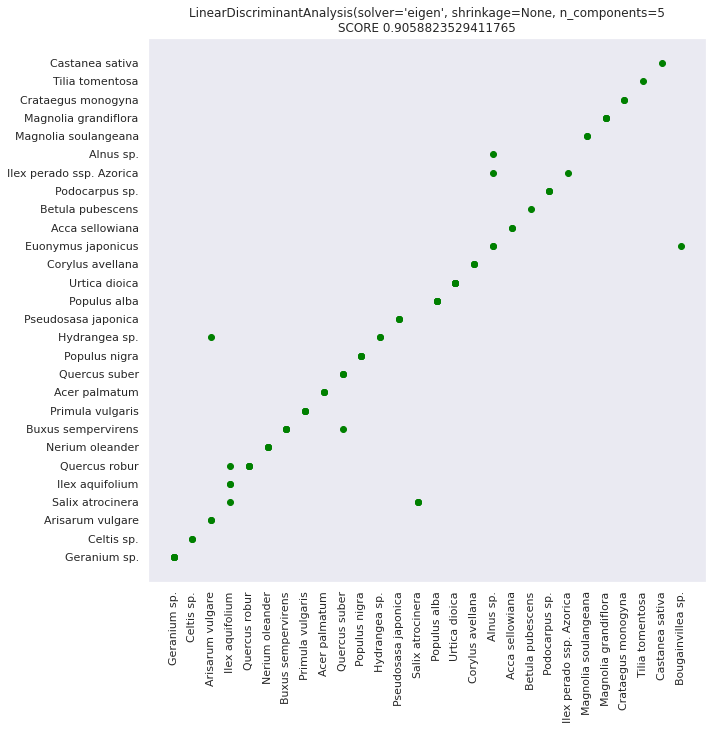

In [343]:
clfLDA = LinearDiscriminantAnalysis()
X_lda = clfLDA.fit_transform(X_train,y_train)
#X_ldaf = clfLDA.fit(X_lda,y_train)
y_pred = clfLDA.predict(X_test)

plt.figure(figsize=(10,10))
plt.title("LinearDiscriminantAnalysis(solver='eigen', shrinkage=None, n_components=5\n"+"SCORE "+str(clfLDA.score(X_test,y_test)))
plt.xticks(rotation=90)
plt.scatter(y_test,y_pred,c="green");


# **RESULT**

We deployed the Linear Discriminant Analyzer with the default arguments and use the fit and transform method to project our unscaled data into a lower space that maximize separability.


clfLDA = LinearDiscriminantAnalysis()

X_lda = clfLDA.fit_transform(X_train,y_train)

y_pred = clfLDA.predict(X_test)

The Confusion Matrix below show the miss classiefied leaf species

The Accuaracy is around 90% the averarge Precision is 88%, average Recall is 87% and the average F1-Score is 86%.

and it may be easlily confussed for another species

The LDA component graph below shows that first two components hold 75% of the explained variance  


We also caputured the tranaformed feature data so can use it in another classifier.



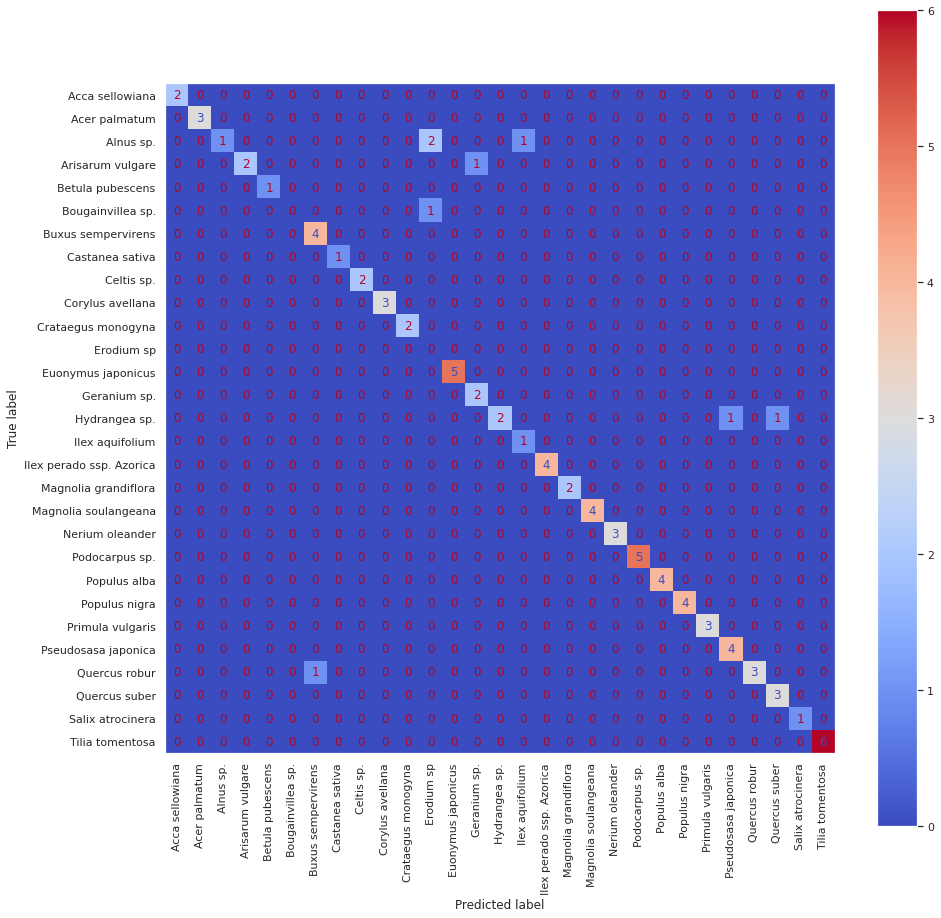

In [348]:
fig,ax = plt.subplots(figsize =(15,15));
plot_confusion_matrix( clfLDA,X_test,y_test,xticks_rotation='90',cmap=plt.cm.coolwarm,ax=ax);
plt.show();

In [349]:
print(classification_report(y_test,y_pred))  

                          precision    recall  f1-score   support

         Acca sellowiana       1.00      1.00      1.00         2
           Acer palmatum       1.00      1.00      1.00         3
               Alnus sp.       1.00      0.25      0.40         4
        Arisarum vulgare       1.00      0.67      0.80         3
        Betula pubescens       1.00      1.00      1.00         1
       Bougainvillea sp.       0.00      0.00      0.00         1
      Buxus sempervirens       0.80      1.00      0.89         4
         Castanea sativa       1.00      1.00      1.00         1
              Celtis sp.       1.00      1.00      1.00         2
        Corylus avellana       1.00      1.00      1.00         3
      Crataegus monogyna       1.00      1.00      1.00         2
      Euonymus japonicus       0.00      0.00      0.00         0
            Geranium sp.       1.00      1.00      1.00         5
           Hydrangea sp.       0.67      1.00      0.80         2
         

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [350]:
print(accuracy_score(y_test,y_pred))

0.9058823529411765


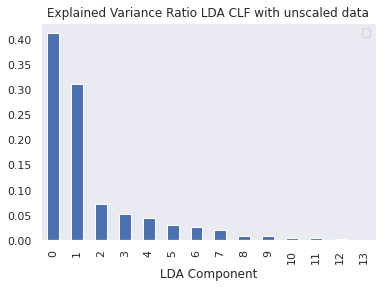

In [351]:
X = X_train
y = y_train
target_names = df.Number
explained_variance = pd.DataFrame(clfLDA.explained_variance_ratio_)
ax = explained_variance.head(14).plot.bar()
ax.legend("")
ax.set_xlabel('LDA Component')
plt.title("Explained Variance Ratio LDA CLF with unscaled data")
X_lda = clfLDA.fit_transform(X_train_scaled,y_train)

The plots below give us some idea of are feature data is seperated for PCA, LDA and nearest neighbors

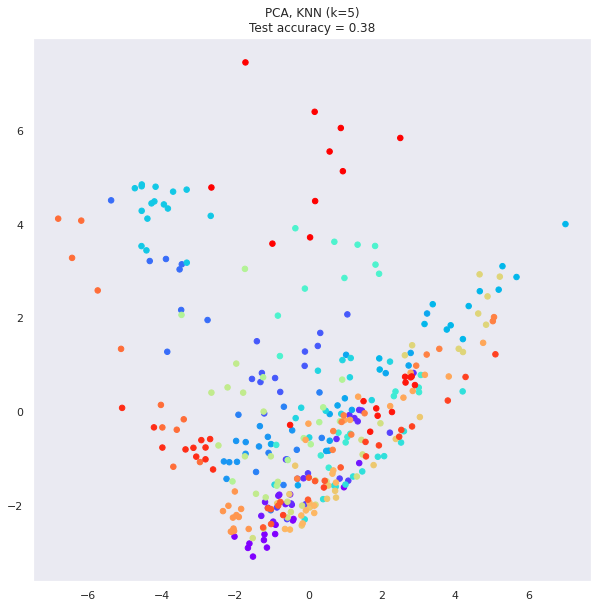

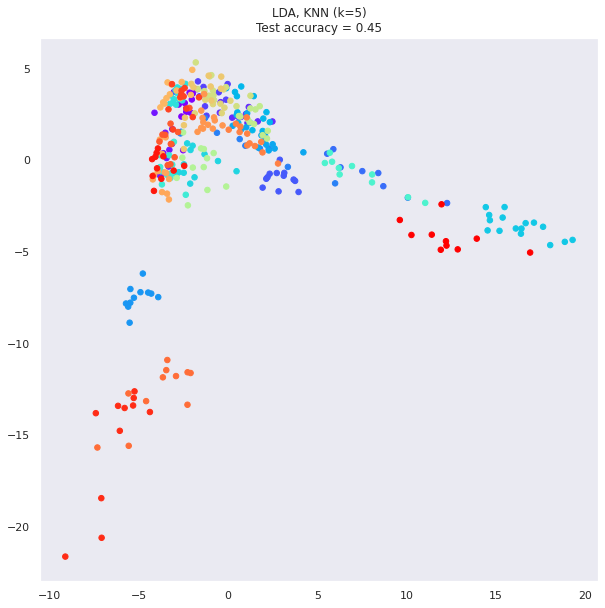

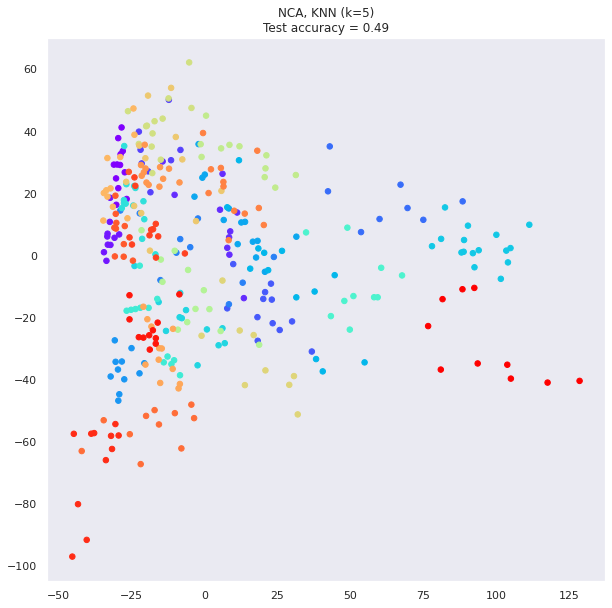

In [352]:
n_neighbors = 5
random_state = 211

# Load dataset
X = features
y = names

# Split into train/test
X_train0, X_test0, y_train0, y_test0 = train_test_split(X,y,test_size=0.5, stratify=y,random_state=random_state)

dim = len(np.unique(X))
n_classes = len(np.unique(y))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure(figsize=(10,10));
    #plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train);

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train0), y_train0);

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test0), y_test0);

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X);

    # Plot the projected points and show the evaluation score
    #plt.figure(figsize=(10,10));
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=number, s=30, cmap='rainbow');
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                         acc_knn));
plt.show();


The sklearn Discriminant Analysis Linear Discriminant Analysis documentation meantions the following attribute so we print some out and try thing or visualize what they mean



```
Attributes
coef_ndarray of shape (n_features,) or (n_classes, n_features)
Weight vector(s).

intercept_ndarray of shape (n_classes,)
Intercept term.

covariance_array-like of shape (n_features, n_features)
Weighted within-class covariance matrix. It corresponds to sum_k prior_k * C_k where C_k is the covariance matrix of the samples in class k. The C_k are estimated using the (potentially shrunk) biased estimator of covariance. If solver is ‘svd’, only exists when store_covariance is True.

explained_variance_ratio_ndarray of shape (n_components,)
Percentage of variance explained by each of the selected components. If n_components is not set then all components are stored and the sum of explained variances is equal to 1.0. Only available when eigen or svd solver is used.

means_array-like of shape (n_classes, n_features)
Class-wise means.

priors_array-like of shape (n_classes,)
Class priors (sum to 1).

scalings_array-like of shape (rank, n_classes - 1)
Scaling of the features in the space spanned by the class centroids. Only available for ‘svd’ and ‘eigen’ solvers.

xbar_array-like of shape (n_features,)
Overall mean. Only present if solver is ‘svd’.

classes_array-like of shape (n_classes,)
Unique class labels.
```



In [167]:
print("Coef_:")
pd.DataFrame(clfLDA.coef_).head().style.background_gradient(cmap='Greys')


Coef_:


In [168]:
print("Intercept:")
pd.DataFrame(clfLDA.intercept_, columns=['Interecpt']).style.background_gradient(cmap='Greys')

Intercept:


In [169]:
print("Means")
pd.DataFrame(clfLDA.means_).style.background_gradient(cmap='Greys')


Means


In [170]:
print("Scalings:")
pd.DataFrame(clfLDA.scalings_).style.background_gradient(cmap='Greys')

Scalings:


In [171]:

pd.DataFrame(clfLDA.classes_,columns=['class']).style.background_gradient()

In [172]:
pd.DataFrame(clfLDA.explained_variance_ratio_,columns=['EV']).style.background_gradient("Greys")

We now run the RandomForestClassifier and note its performance
We are seeing and Accuracy of around 74% when run with unscaled data

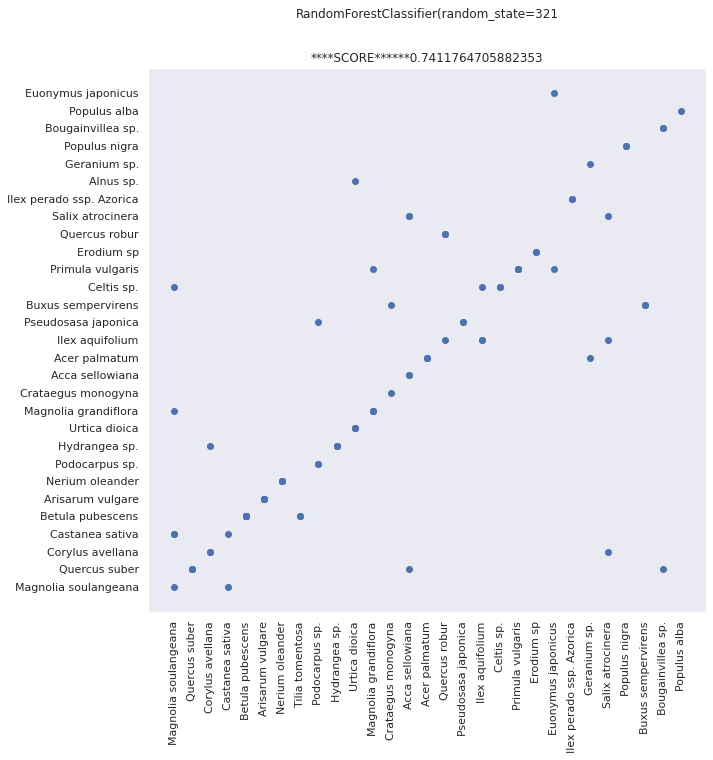

In [354]:
X_trainrf, X_testrf, y_trainrf, y_testrf = train_test_split(features,names, random_state=331)
clf_rf = RandomForestClassifier(random_state=321)
clf_rf.fit(X_trainrf,y_trainrf)
y_predrf = clf_rf.predict(X_testrf)
plt.figure(figsize=(10,10))
plt.title("RandomForestClassifier(random_state=321"+ "\n\n\n****SCORE******"+ str(clf_rf.score(X_testrf,y_testrf)))
plt.scatter(y_testrf,y_predrf)
plt.xticks(rotation=90)
print()
print()
#print(clf_rf.feature_importances_)

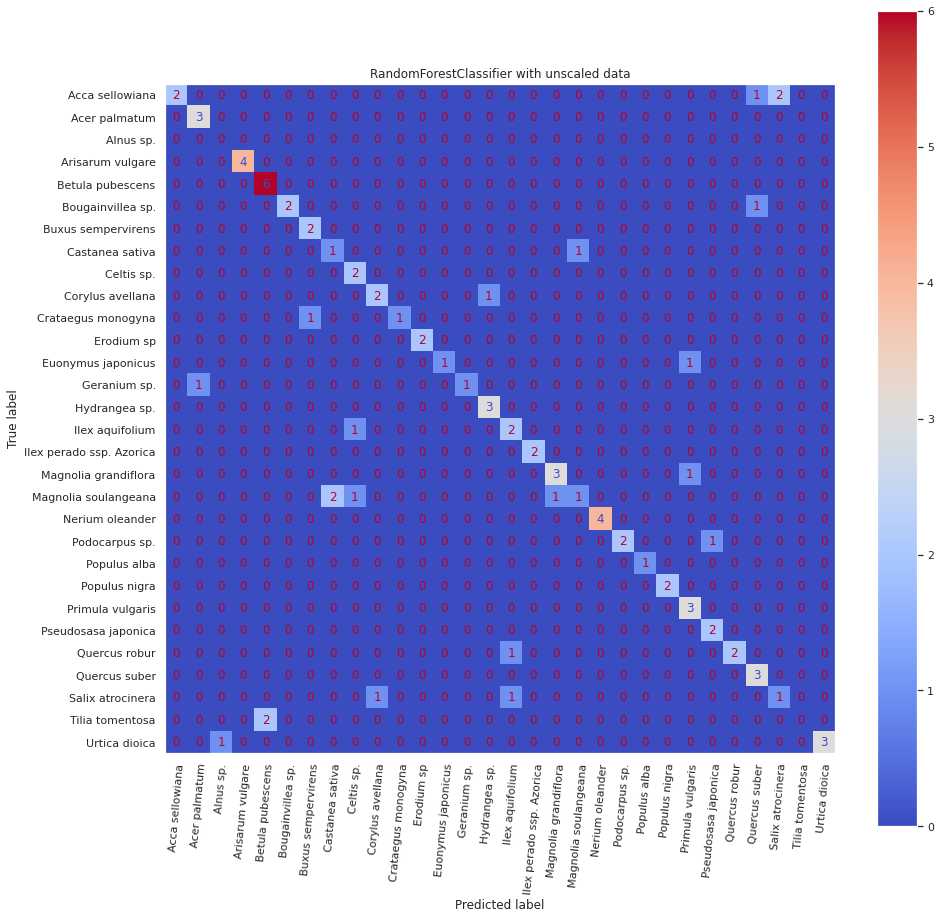

In [356]:
fig,ax = plt.subplots(figsize =(15,15))
plot_confusion_matrix(clf_rf,X_testrf,y_testrf,xticks_rotation='85',cmap=plt.cm.coolwarm,ax=ax)
plt.title("RandomForestClassifier with unscaled data")
plt.show()

# **RESULT**
We now execute the RandomForestClassifier with the transform features from the LDA transform method and we see and Accuracy score of around 83% are previous resut with unscaled data was around 74%


This is the entire point of this execrsise, we showed that improve the prediction performance a classier by reducing the dimension of the feataurs by transforming into a more favarable subspace, this all seems to good to be true but with put a big contraint on the features requirinng them to normally distrbuted and share the same overall variance.



In [397]:
from sklearn.model_selection import train_test_split
le0 = LabelEncoder
y0_ = le0.fit_transform(features,names);
sk_lda = LinearDiscriminantAnalysis(n_components=14);
X_lda0 = sk_lda.fit_transform(features,names);
X_trainLDA, X_testLDA, y_trainLDA, y_testLDA = train_test_split(X_lda0 ,y0_, random_state=211);



In [398]:
clf_rf = RandomForestClassifier(random_state=111);
clf_rf.fit(X_trainLDA,y_trainLDA)
y_predLDA = clf_rf.predict(X_testLDA);

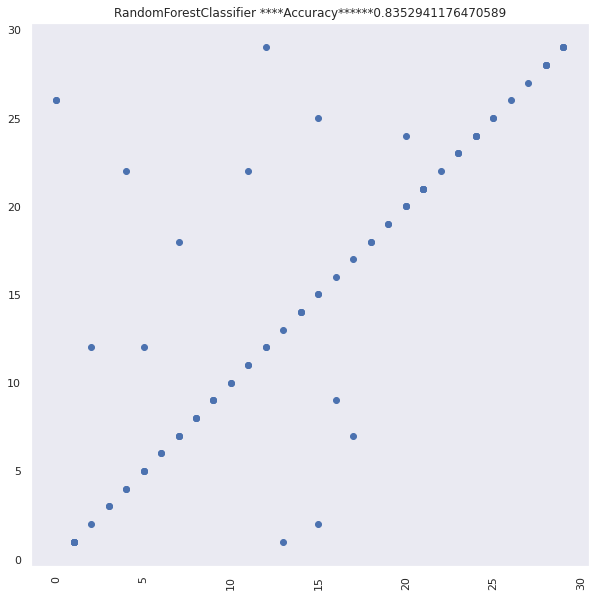

In [399]:
plt.figure(figsize=(10,10))
plt.scatter(y_testLDA,y_predLDA);
plt.xticks(rotation=90);
plt.title("RandomForestClassifier ****Accuracy******"+ str(clf_rf.score(X_testLDA,y_testLDA)));

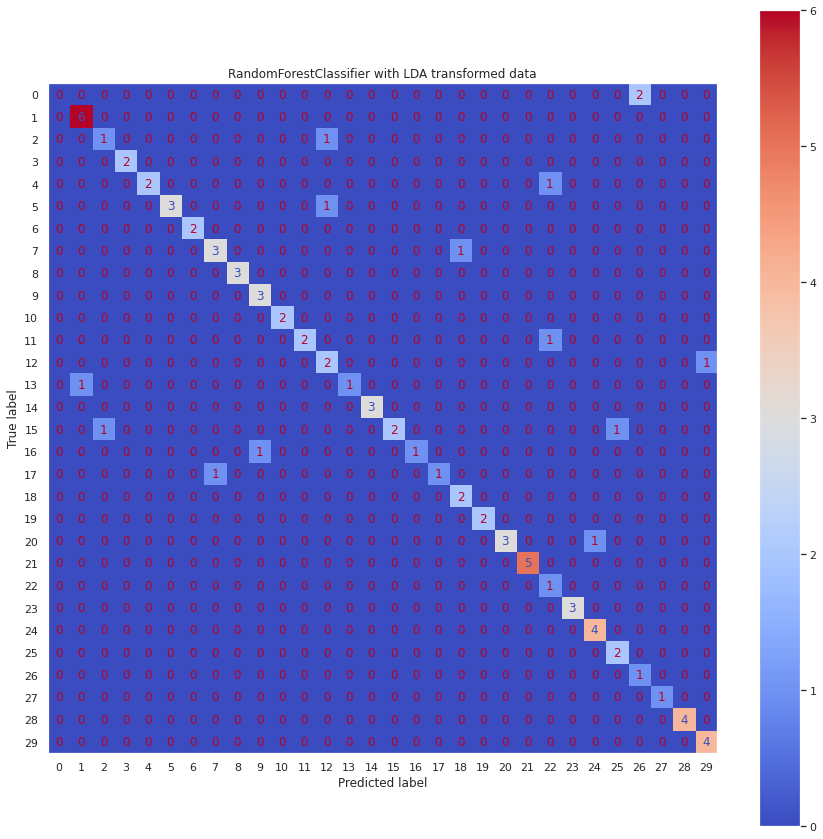

In [402]:
fig,ax = plt.subplots(figsize =(15,15))
plot_confusion_matrix(clf_rf,X_testLDA,y_testLDA,cmap=plt.cm.coolwarm,ax=ax)
plt.title("RandomForestClassifier with LDA transformed data")
plt.show();

In [ ]:
#display(IFrame(src='https://medium.com/swlh/recall-precision-f1-roc-auc-and-everything-542aedf322b9#:~:text=F1%20Score%20combines%20Recall%20and,have%20an%20uneven%20class%20distribution', width=1500, height=600))

In [403]:
print(classification_report(y_testLDA,y_predLDA))  

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.86      1.00      0.92         6
           2       0.50      0.50      0.50         2
           3       1.00      1.00      1.00         2
           4       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         2
           7       0.75      0.75      0.75         4
           8       1.00      1.00      1.00         3
           9       0.75      1.00      0.86         3
          10       1.00      1.00      1.00         2
          11       1.00      0.67      0.80         3
          12       0.50      0.67      0.57         3
          13       1.00      0.50      0.67         2
          14       1.00      1.00      1.00         3
          15       1.00      0.50      0.67         4
          16       1.00      0.50      0.67         2
          17       1.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Combining PCA AND LDA an experiment 
We now transform scaled feature data to LD space and use the output as input into the PCA transform.

We then transform the scaled feature data to PC space and the output as input for the LDA transform.

We use the Random Forest Classifier again to gauge the results.

#**RESULT**
RandomForestClassifier(LDA=>PCA) returned an Accuracy of 88%

RandomForestClassifier((PCA=>LDA) returned an Accuracy of 90%)



We need to look into further for the theoretical reason using hybrid
of PCA and LDA outperformed just using LDA but we are encouraged by the results.
Please see the confusion matrix and classification reports for both experiments below.



In [404]:
scaler = StandardScaler().fit(features)
features_scaled = pd.DataFrame(scaler.transform(features), index=features.index.values, columns=features.columns.values)
pca = PCA()
sk_lda = LinearDiscriminantAnalysis(n_components=14)
X_lda0 = sk_lda.fit_transform(features_scaled,names)
X_pcalda = pca.fit_transform(X_lda0,names)
X_trainpl1, X_testpl1, y_trainpl1, y_testpl1 = train_test_split(X_pcalda, names, random_state=211)


In [405]:
clf_rf = RandomForestClassifier(random_state=711)
clf_rf.fit(X_trainpl1,y_trainpl1)
y_predpl1 = clf_rf.predict(X_testpl1)

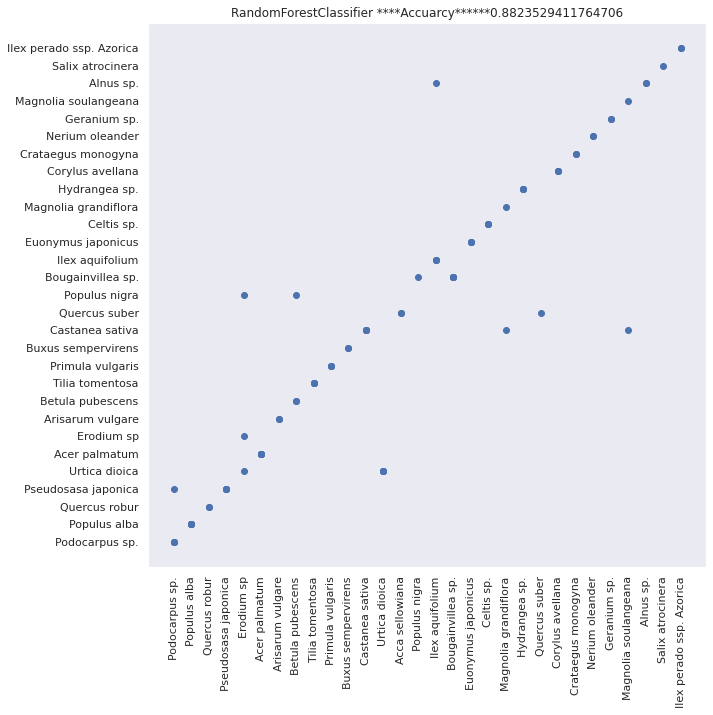

In [406]:
plt.figure(figsize=(10,10))
plt.scatter(y_testpl1,y_predpl1)
plt.xticks(rotation=90)
plt.title("RandomForestClassifier ****Accuarcy******"+ str(clf_rf.score(X_testpl1,y_testpl1)));

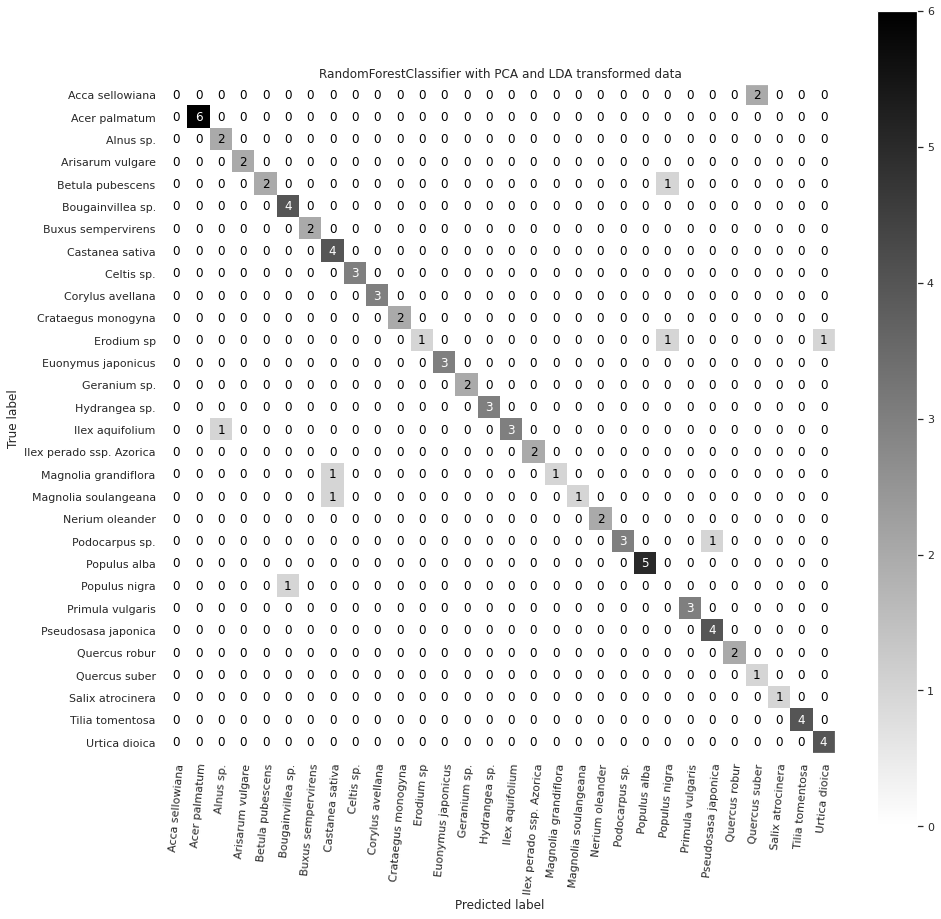

In [407]:
fig,ax = plt.subplots(figsize =(15,15))
plot_confusion_matrix(clf_rf,X_testpl1,y_testpl1,xticks_rotation='85',cmap=plt.cm.binary,ax=ax)
plt.title("RandomForestClassifier with PCA and LDA transformed data")
plt.show();

In [408]:
print(classification_report(y_testpl1,y_predpl1))  

                          precision    recall  f1-score   support

         Acca sellowiana       0.00      0.00      0.00         2
           Acer palmatum       1.00      1.00      1.00         6
               Alnus sp.       0.67      1.00      0.80         2
        Arisarum vulgare       1.00      1.00      1.00         2
        Betula pubescens       1.00      0.67      0.80         3
       Bougainvillea sp.       0.80      1.00      0.89         4
      Buxus sempervirens       1.00      1.00      1.00         2
         Castanea sativa       0.67      1.00      0.80         4
              Celtis sp.       1.00      1.00      1.00         3
        Corylus avellana       1.00      1.00      1.00         3
      Crataegus monogyna       1.00      1.00      1.00         2
              Erodium sp       1.00      0.33      0.50         3
      Euonymus japonicus       1.00      1.00      1.00         3
            Geranium sp.       1.00      1.00      1.00         2
         

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


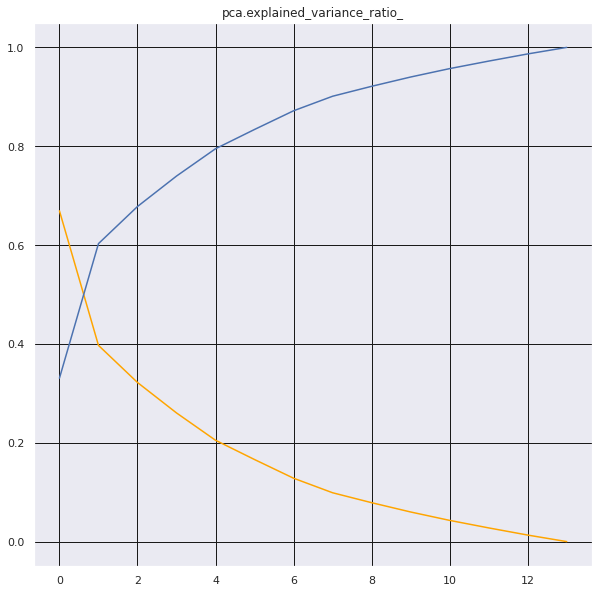

In [385]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4))
plt.figure(figsize=(10,10))
plt.plot( 1 - var1, color="orange")
plt.plot(var1);
plt.grid(color='k', linestyle='-', linewidth=1)
plt.title('pca.explained_variance_ratio_');

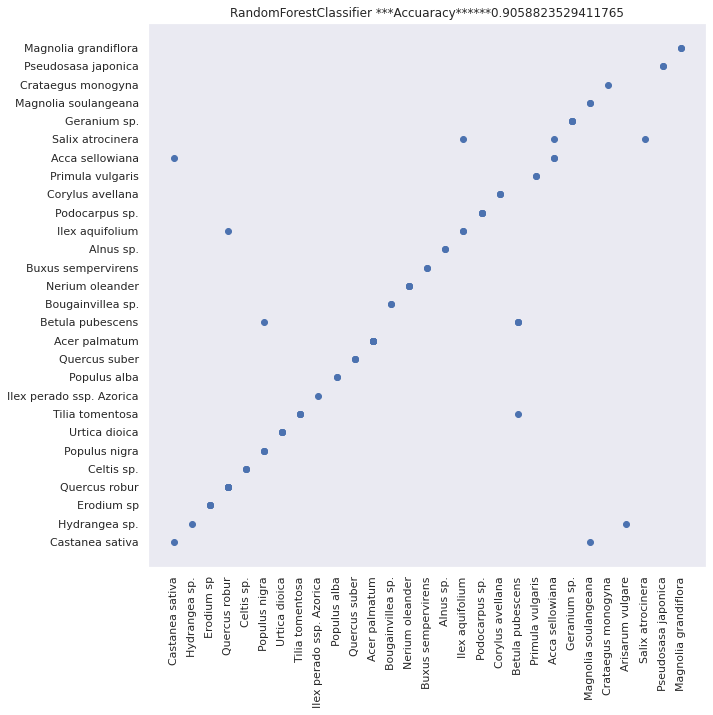

In [409]:
pca = PCA()
X_pca = pca.fit_transform(features_scaled,names)
X_ldapca = sk_lda.fit_transform(X_pca ,names)

X_trainpl, X_testpl, y_trainpl, y_testpl = train_test_split(X_ldapca, names, random_state=321)

clf_rf = RandomForestClassifier(random_state=611)
clf_rf.fit(X_trainpl,y_trainpl)
y_predpl = clf_rf.predict(X_testpl)
plt.figure(figsize=(10,10))
plt.scatter(y_testpl,y_predpl)
plt.xticks(rotation=90)
#print(clf_rf.feature_importances_)
plt.title("RandomForestClassifier ***Accuaracy******"+ str(clf_rf.score(X_testpl,y_testpl)));


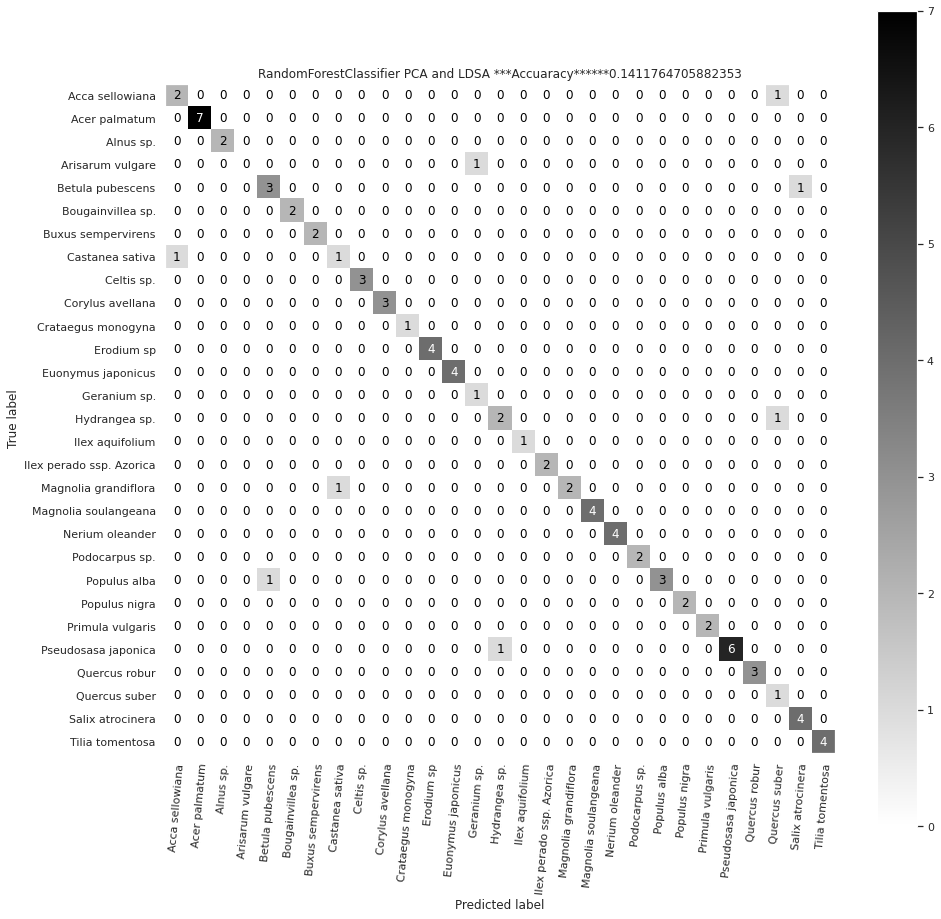

In [410]:
fig,ax = plt.subplots(figsize =(15,15));
plot_confusion_matrix(clf_rf,X_testpl,y_testpl,xticks_rotation='85',cmap=plt.cm.binary,ax=ax);
plt.title("RandomForestClassifier PCA and LDSA ***Accuaracy******"+ str(clf_rf.score(X_testpl1,y_testpl1)));
plt.show();


In [411]:
print(classification_report(y_testpl,y_predpl)) 

                          precision    recall  f1-score   support

         Acca sellowiana       0.67      0.67      0.67         3
           Acer palmatum       1.00      1.00      1.00         7
               Alnus sp.       1.00      1.00      1.00         2
        Arisarum vulgare       0.00      0.00      0.00         1
        Betula pubescens       0.75      0.75      0.75         4
       Bougainvillea sp.       1.00      1.00      1.00         2
      Buxus sempervirens       1.00      1.00      1.00         2
         Castanea sativa       0.50      0.50      0.50         2
              Celtis sp.       1.00      1.00      1.00         3
        Corylus avellana       1.00      1.00      1.00         3
      Crataegus monogyna       1.00      1.00      1.00         1
              Erodium sp       1.00      1.00      1.00         4
            Geranium sp.       1.00      1.00      1.00         4
           Hydrangea sp.       0.50      1.00      0.67         1
         

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


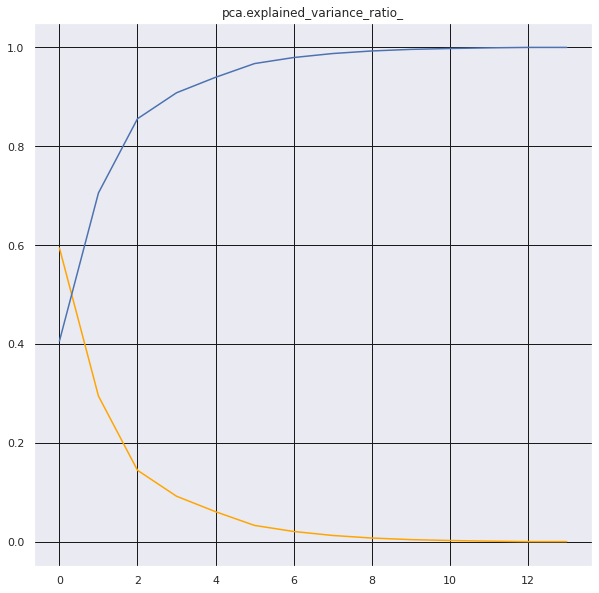

In [389]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4))
plt.figure(figsize=(10,10))
plt.plot( 1 - var1, color="orange")
plt.plot(var1);
plt.grid(color='k', linestyle='-', linewidth=1)
plt.title('pca.explained_variance_ratio_');

In [413]:
print(classification_report(y_testpl,y_predpl))  

                          precision    recall  f1-score   support

         Acca sellowiana       0.67      0.67      0.67         3
           Acer palmatum       1.00      1.00      1.00         7
               Alnus sp.       1.00      1.00      1.00         2
        Arisarum vulgare       0.00      0.00      0.00         1
        Betula pubescens       0.75      0.75      0.75         4
       Bougainvillea sp.       1.00      1.00      1.00         2
      Buxus sempervirens       1.00      1.00      1.00         2
         Castanea sativa       0.50      0.50      0.50         2
              Celtis sp.       1.00      1.00      1.00         3
        Corylus avellana       1.00      1.00      1.00         3
      Crataegus monogyna       1.00      1.00      1.00         1
              Erodium sp       1.00      1.00      1.00         4
            Geranium sp.       1.00      1.00      1.00         4
           Hydrangea sp.       0.50      1.00      0.67         1
         

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


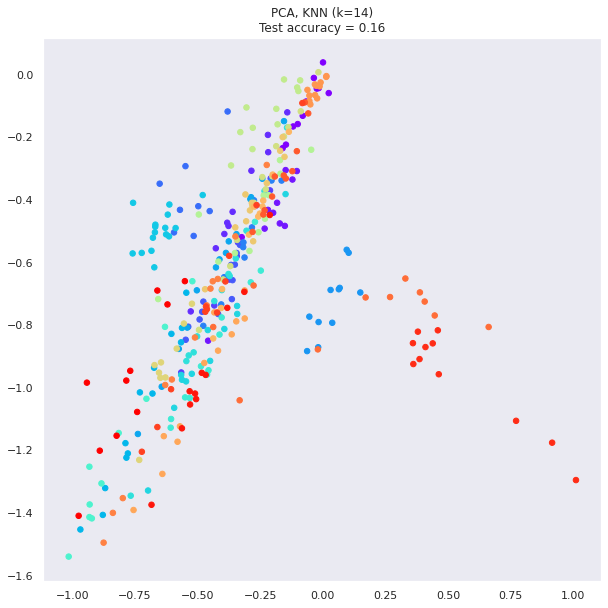

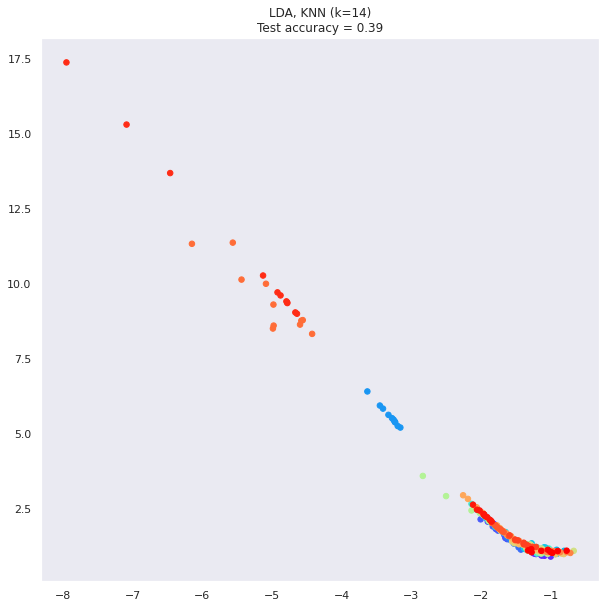

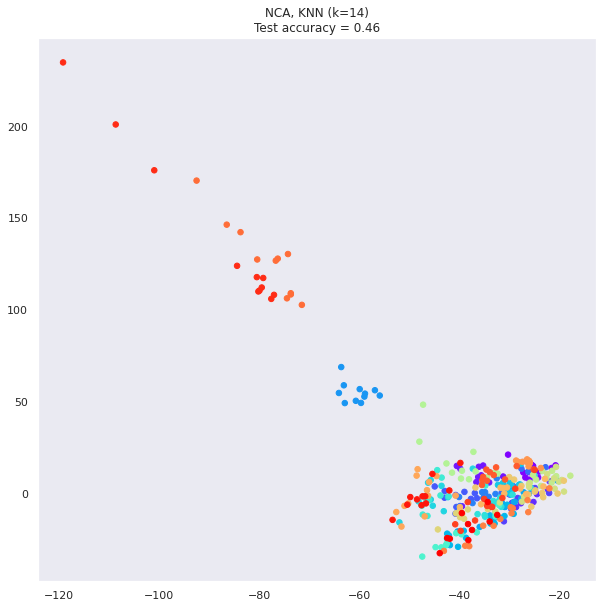

In [414]:
n_neighbors = 14
random_state = 211

# Split into train/test
X_trainldapca, X_testldapca, y_trainldapca, y_testldapca = train_test_split(X_ldapca,y,test_size=0.333, stratify=y,random_state=random_state)



dim = len(np.unique(X))
n_classes = len(np.unique(y))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure(figsize=(10,10))
    #plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_trainldapca, y_trainldapca)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_trainldapca), y_trainldapca)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_testldapca), y_testldapca)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=number, s=30, cmap='rainbow')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                         acc_knn))

# Further Investigation 

We need to look into further for the theoretical reason using hybrid
of PCA and LDA outperformed just using LDA but we are encouraged by the results.
Please see the confusion matrix and classification reports for both experiments below.


The number one item that held the dataset from performing better with classification models was the lack of data.

This dataset was created in 2013, even then there were establish large datasets for plants that could have been used to create a more robust dataset.

Leaf classification is a visual task so using Deep Learning with convolution Neural Networks would big a more practical approach to the classification leaves.  

We loaded the picture of the leaves to Google Cloud Console splitting them into training and test datasets and feed them into Google AutoML  Vision offering and we had no issues returning model that was 100% accurate. 

There is also room to improve how we visualize variance inflation factors for more than two features.

